# TO DO
1. Проверить диапазон
2. Проверить на SP500
3. Создать именно пути с резистом и суппортом. 1S - support 1R - resistance
4. Найти pattern в путях? Где задерживалась цена во время пути во время рост или падения? 
   Вектор движения цены для создания кластеров.
5. Если диапазон широкий то какая с большей ли вероятностью что она развернется? количество точек разворота.

так вот нашей целью будет для нескольких инструментов посмотреть на похожие временные диапазоны, 
отложить от этих диапазонов вверх и вниз стандартные гармоники (1 гармоника = 1 такой же диапазон) и посмотреть, что цена делает на этих линиях:
- разворачивается ли она на этих гармониках? на каких? +2, +3, +6? 
- а если развернулась, то куда дальше идёт? до +1 (это верхняя граница диапазона временного)? до +0.5 
(это середина диапазона)? или проваливается вниз до -1 или вообще -5?

сразу надо сказать, что мы не ищем развороты точно от заданной линии, всегда могут быть недолёты и перелёты, 
надо будет установить какую-то стандартную буферную зону, где разворот засчитывается. 
Условно говоря, если цена не дошла до гармоники [+3] 1-2% от диапазона и развернулась - это ок, можно засчитывать. 
Но если она перелетела линию гармоники на 80% диапазона - это уже не считаем за разворот в [+3], 
а считаем за разворот, но на “спорной территории” - надо будет смотреть, 
сколько таких кейсов будет и понять, куда их относить, к какой гармонике. 

также мы должны будем установить ,что считаем разворотом - какое движение цены, на сколько % вверх или вниз.

Цель - найти точки, где цена разворачивается чаще всего.  
Работать мы будем сначала не со свечами, а с линией на h1 
(так больше точек контакта видно - проще определять, что линия стала саппортом или резистом)

Мы будем искать повторяющиеся паттерны. понятно, что каждый раз цена не будет как-то взаимодействовать или откатываться к определенным гармоникам, но если мы увидим тренд в результатах - это будет интересно

### Definitions
- мы всегда используем время UTC. Если где-то говорим “19 часов” - это время UTC всегда, вне зависимости от того, что мы торгуем. 
- диапазон из каждого месяца оцениванием в пределах месяца, когда он случился, только форвардом (то есть если диапазон второго вторника-среды месяца, то к данным за первую неделю месяца мы его не примеряем - тогда этого диапазона еще не было).
- если смотрим четвертый диапазон месяца (последний), то смотрим, как он работает со следующим месяцем - задает ли он тон цене на первую-вторую-третью-четвертую недели

### Инструменты:
- ES1!
- NQ1!
- BTCUSDT (Binance Perps)
- ETHUSDT (Binance Perps)
- DXY 
- EURUSD

2. мы смотрим на график Line по 1H close, смотрим не в течение дня, а в течение 1 недели - 1 месяца - 3 месяцев после возникновения диапазона. 
    То есть, например, мы смотрим на диапазон в первый вторник месяца с **Tuesday 5:00 UTC до Wednesday 13:00 UTC** (всё время я даю в формате 24 часов).
    И дальше смотрим, как цена в течение всего месяца взаимодействовала с этим диапазоном и его гармониками. 
    Потом расширяем горизонт до 3 месяцев - были ли этот диапазон и его гармоники важны? 
    То есть, разворачивалась ли от них цена? Или цена находит поддержку на определенной гармонике?
3. надо смотреть на 2021, 2022 и 2023 года для каждого инструмента

# Example Bitcoin

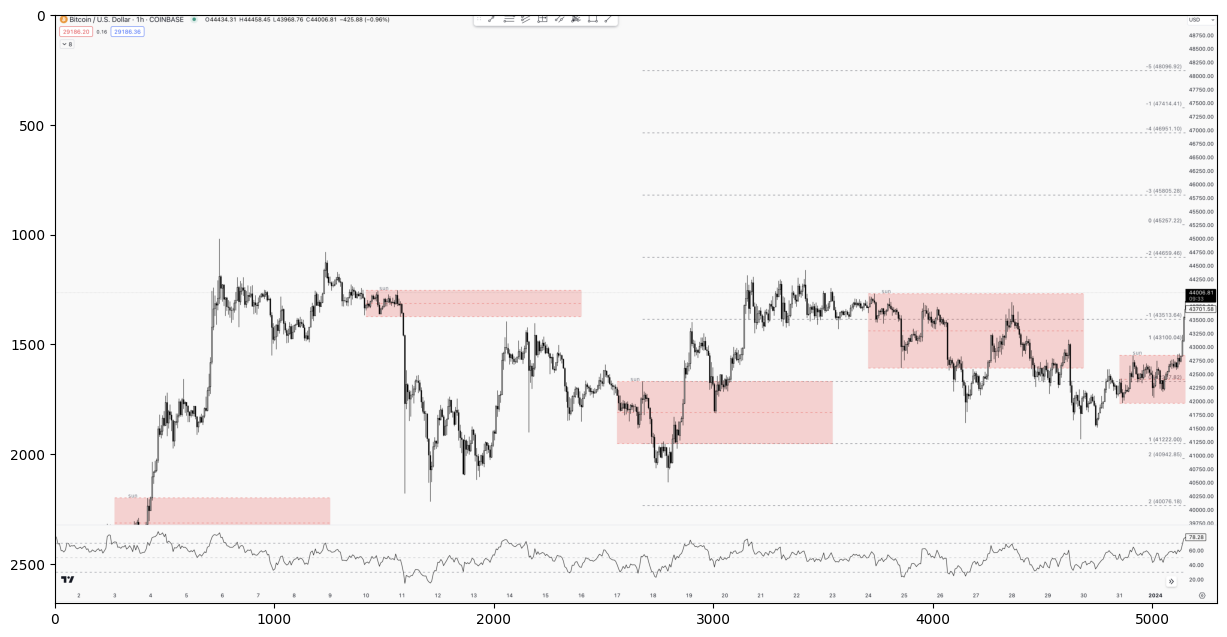

In [1]:
import matplotlib.pyplot as plt
img = plt.imread('pics/bitcoing_0.png')
plt.subplots(figsize=(15, 10))
plt.imshow(img);

**красный диапазон**, сформировался в воскресенье, и мы видим, что от середины диапазона цена вечером во вторник оттолкнулась и поехала наверх (19-20 число).

Как мы чертим этот диапазон: 
- отмечаем high для воскресенья (день определяем строго по UTC) и low, а также середину между ними. считаем, что high и low, а также mid - это очень значимые линии. цена будет в начале новой недели их уважать и тестировать их и дальше делать что-то интересное для нас.
- теперь, мы можем отложить от этого воскресного диапазона гармоники. это Х таких же диапазонов вверх\вниз.
- например, цена в воскресенье была между 100 и 150. наш диапазон - [100;150] или [0;1]. соответсвенно, одна гармоника вверх - это диапазон [1;2] или [150;200]. такую лесенку мы делаем на 6-7 гармоник вверх и вниз. выглядит вот так:

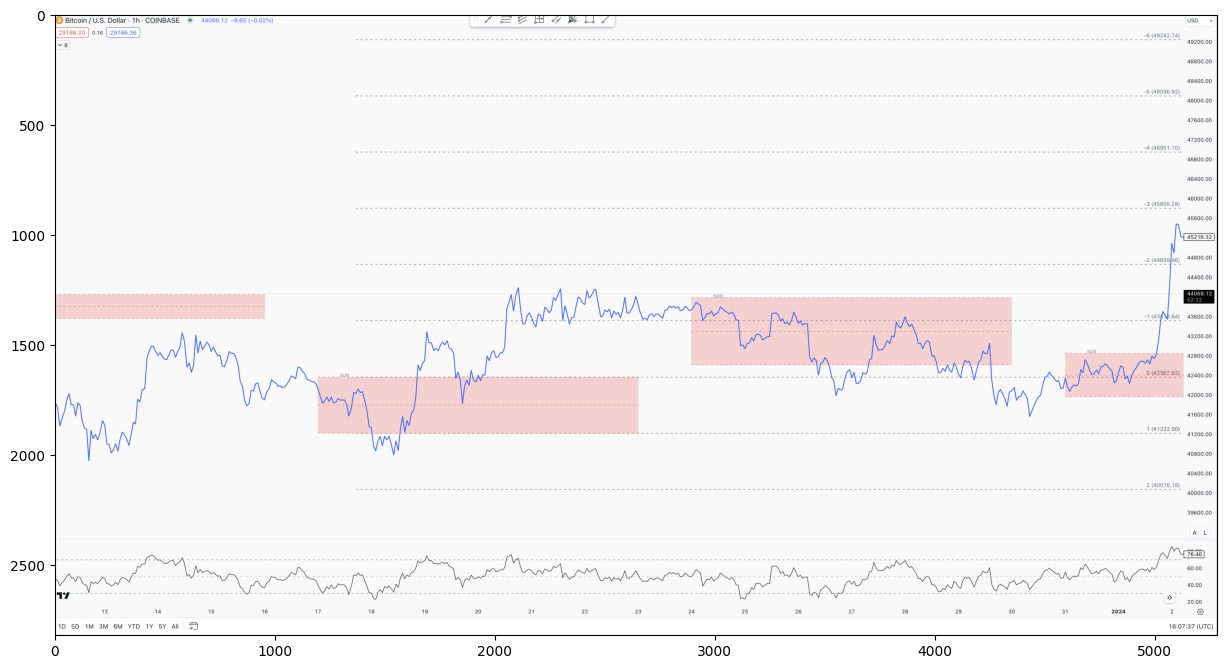

In [2]:
img = plt.imread('pics/bitcoin_2.png')
plt.subplots(figsize=(15, 10))
plt.imshow(img);

- Гармоника [-1] была саппортом для цены в районе 20-24 числа
- Гармоника [0] (это вершина нашего диапзаона воскресного) - саппортом в районе 25-29ого числа

то есть мы взяли временной орезок, по нему построили диапазон, а потом вверх и вниз отложили по 6-7 таких же диапазонов. и дальше смотрим, уважала ли цена эти линии.  
оказывается, уважала [-1] и [0] (тут -1 потому что у меня диапазон перевернут вверх ногами, то есть 0 у меня - это вершина, а 1 - низ, и поэтому одна гармоника выше будет не [2], а [-1], но это не важно).

работать мы будем сначала не со свечами, а с линией на h1 (так больше точек контакта видно - проще определять, что линия стала саппортом или резистом)  
типа такого:

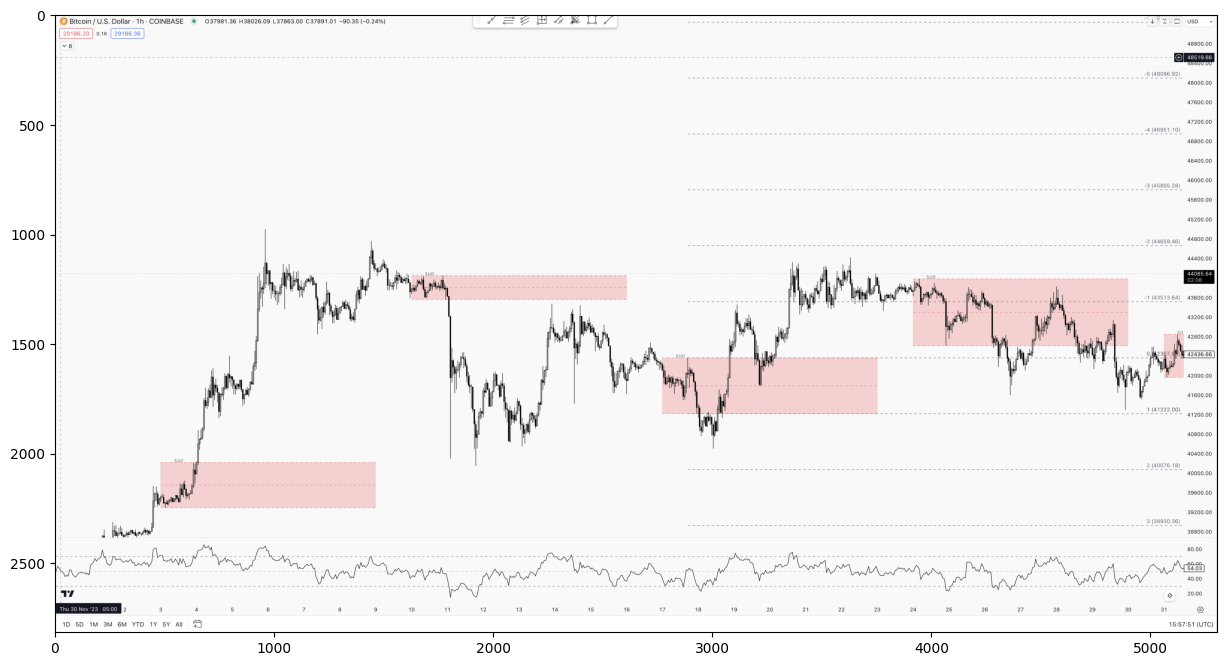

In [3]:
img = plt.imread('pics/bitcoin_9.png')
plt.subplots(figsize=(15, 10))
plt.imshow(img);




возьмем диапазон воскресенья для BTC (для обычных рынков он не существует, в воскресенье ничего не торгуется), вот как он выглядит:

# Example SP

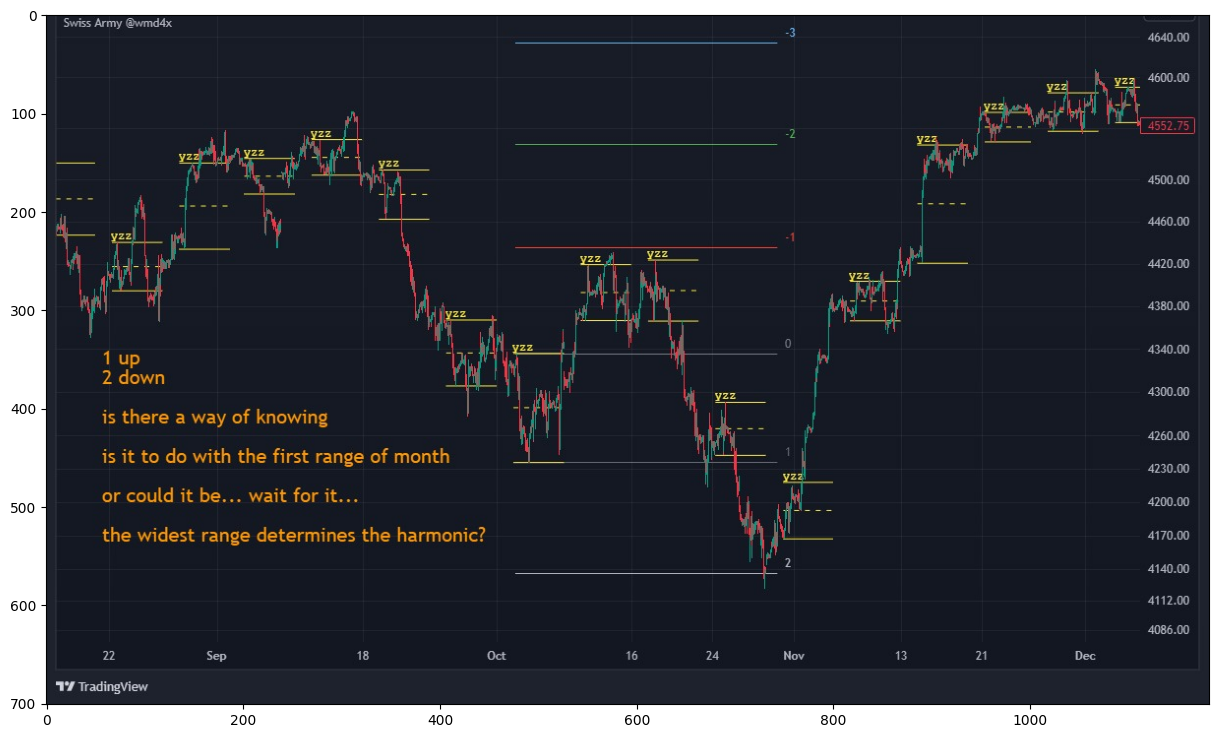

In [4]:
import matplotlib.pyplot as plt
img = plt.imread('pics/sp500_1.jpeg')
plt.subplots(figsize=(15, 10))
plt.imshow(img[50:1100, :, :]);

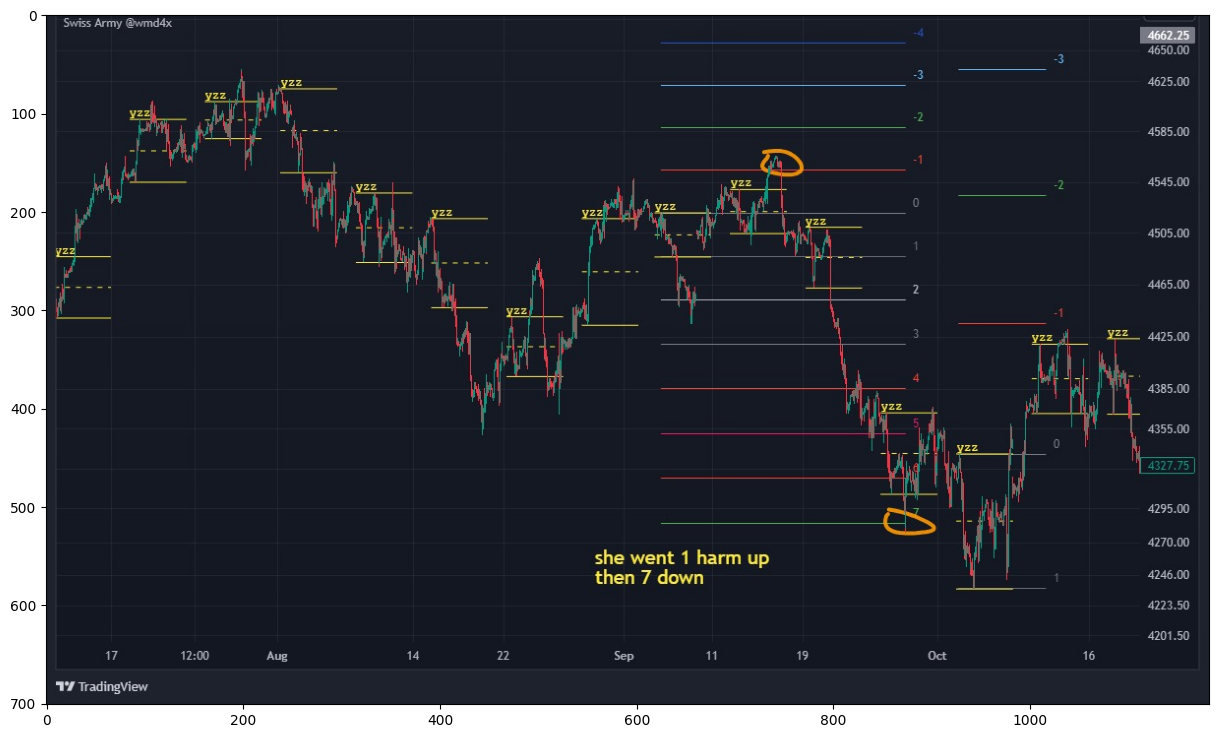

In [5]:
img = plt.imread('pics/sp500_2.jpeg')
plt.subplots(figsize=(15, 10))
plt.imshow(img[50:1100, :, :]);

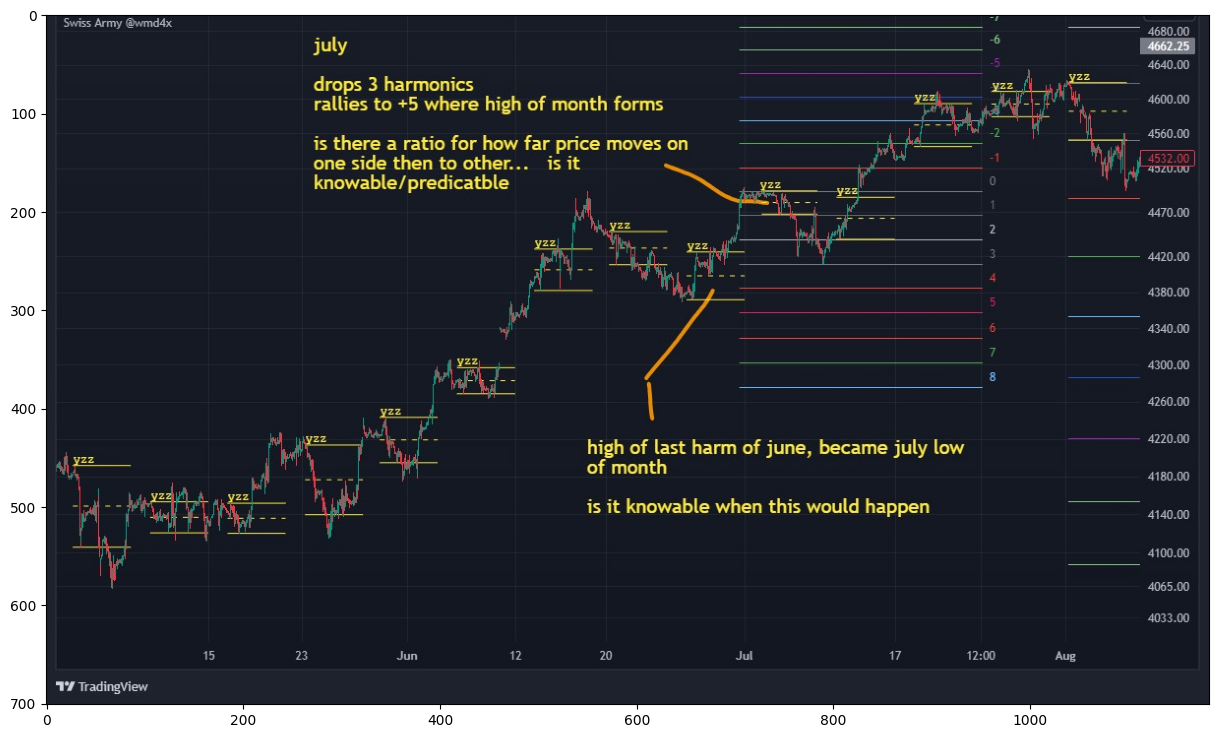

In [6]:
img = plt.imread('pics/sp500_3.jpeg')
plt.subplots(figsize=(15, 10))
plt.imshow(img[50:1100, :, :]);

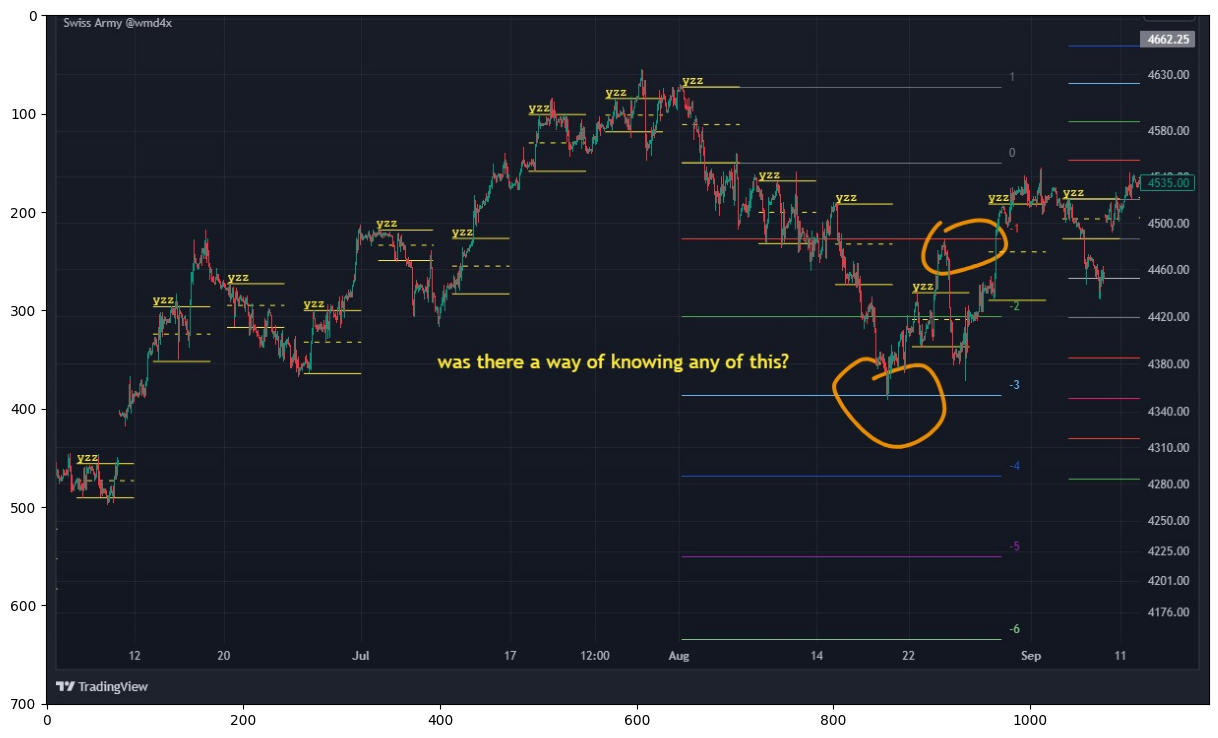

In [7]:
img = plt.imread('pics/sp500_4.jpeg')
plt.subplots(figsize=(15, 10))
plt.imshow(img[50:1100, :, :]);

### Вопросы:
1. можно ли предсказать, на сколько гармоник цена поедет от диапазона вверх\вниз?
2. если цена уехала на Х гармоник вверх\вниз, можно ли предсказать, куда она вернется после разворота? Например, 1 гармоника вверх, 7 вниз или 1 вверх, 2 вниз. 
3. Зависит ли предсказательная сила от времени возникновения диапазона (первый вторник, второй вторник и т.п.)? 
4. Зависит ли предсказательная сила от ширины изначального диапазона (узкие имеют плохую силу, широкие - более сильные)?
5. влияют ли диапазоны из одного месяца на диапазоны следующего месяца?

# Example Nasdaq

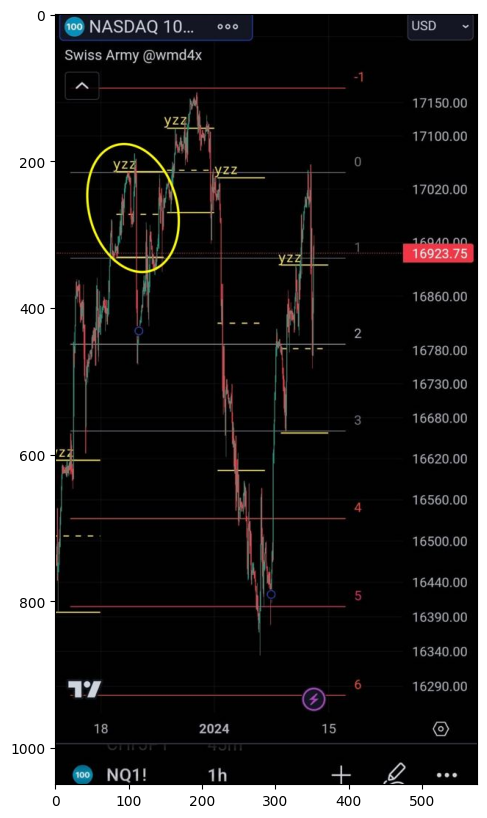

In [8]:
img = plt.imread('pics/example_nasdaq_1.jpg')
plt.subplots(figsize=(15, 10))
plt.imshow(img[50:1100, :, :]);

- были ли похоже последовательности раньше? 
- если цена сходила на -1, +1, можем ли мы думать, что она пойдет на -4 или около того?
- какой из диапазонов важен (в какой вторник месяца \ года) и как долго он остается важным? 
- остается ли уровень 0.5 (середина диапазона [0;1]) важным через 2 недели? можно ли это предсказать на основнии ширины изначального диапазона или движения цены?
- когда случаются ретесты диапазона [0;1] - через день? 5 дней? две недели?
- некоторые диапазоны дают последовательности +1 - (-3), то есть на одну гармонику вверх, потом на 3 вниз. можно ли это предсказать?
- поэтому мы смотрим на все повтояющиеся последовательности, а потом смотрим на предшействующие этим повтрояющимся события с ценой \ ширину диапазона
- также важно - гармоника - это линия, ограничивающая диапазон сверху \ снизу. то есть гармоника 0 - это низ нашего диапазона, 1 - верх, +2 - это линия ограничивающая один диапазон сверху

## UTC timzone

In [9]:
from datetime import datetime
import pytz

# Create a datetime object in 'US/Eastern' timezone
eastern_timezone = pytz.timezone('US/Eastern')
eastern_datetime = eastern_timezone.localize(datetime(2022, 1, 1, 12, 0, 0))

# Convert to UTC
utc_datetime = eastern_datetime.astimezone(pytz.UTC)

print("Original datetime (US/Eastern):", eastern_datetime)
print("Converted datetime (UTC):", utc_datetime)


Original datetime (US/Eastern): 2022-01-01 12:00:00-05:00
Converted datetime (UTC): 2022-01-01 17:00:00+00:00


# Load Bitcoin/ETH

In [10]:
import requests
import joblib
API_FREE = 'H1J0LYXPAGN5RXXH'
# PREMIUM_API_KEY = 'B3NUDPWV2FSGX37H'
# ?function=CRYPTO_INTRADAY&symbol=ETH&market=USD&interval=5min&outputsize=full&apikey=demo
# еth_url = f"""
# https://www.alphavantage.co/query
# ?function=CRYPTO_INTRADAY
# &symbol=ETH
# &market=USD
# &outputsize=full
# &interval=60min
# &apikey={PREMIUM_API_KEY}
# """.replace('\n', '')
# print(еth_url)
# reload = True
# if reload:
#     r = requests.get(еth_url)
#     eth_data = r.json()
#     joblib.dump(eth_data, 'data/eth_data.pk')
# else:
#     eth_data = joblib.load('data/eth_data.pk')
# eth_data.keys()

In [11]:
import pandas as pd

eth_df = pd.read_csv('data/BITSTAMP_ETHUSD, 60.csv')
eth_df['time'] = pd.to_datetime(eth_df['time'])
eth_df = eth_df.set_index('time')
eth_df

,open,high,low,close
time,,,,
2021-01-01 00:00:00+00:00,737.50,740.50,731.00,735.63
2021-01-01 01:00:00+00:00,735.63,750.34,735.19,749.99
2021-01-01 02:00:00+00:00,749.93,750.06,743.81,745.42
2021-01-01 03:00:00+00:00,745.65,748.55,744.85,746.42
2021-01-01 04:00:00+00:00,746.36,748.53,741.38,743.66
...,...,...,...,...
2024-01-15 09:00:00+00:00,2511.90,2531.40,2508.00,2526.80
2024-01-15 10:00:00+00:00,2527.00,2539.80,2524.50,2531.80
2024-01-15 11:00:00+00:00,2532.70,2540.90,2530.90,2538.10


In [12]:
start_tuesday_cond = (
    ((eth_df.index.weekday >= 1) & (eth_df.index.hour >= 5))
    & ((eth_df.index.weekday <= 2) & (eth_df.index.hour <= 13))
)
eth_df['is_diapazon_day'] = start_tuesday_cond
eth_df['calendar_week'] = eth_df.index.year.astype(str) + '-' + eth_df.index.week.astype(str)

eth_df['diapazan_week'] = eth_df.loc[eth_df['is_diapazon_day'], 'calendar_week']
eth_df['diapazan_week'] = eth_df['diapazan_week'].fillna(method='ffill')
eth_df['diapazan_week'].count() - eth_df['diapazan_week'].shape[0]

/tmp/ipykernel_3859/4180308538.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  eth_df['calendar_week'] = eth_df.index.year.astype(str) + '-' + eth_df.index.week.astype(str)


-101

In [13]:
window_size = (24 - 5) + 13
window_high = eth_df[start_tuesday_cond].groupby('diapazan_week')['high'].max()
window_low = eth_df[start_tuesday_cond].groupby('diapazan_week')['low'].min()
window_mid = (window_high + window_low) / 2
diapazon = window_high - window_low
diapazon

diapazan_week
2021-1     195.90
2021-10     68.18
2021-11     83.57
2021-12     88.31
2021-13     86.49
            ...  
2023-7     100.90
2023-8      89.90
2023-9      52.20
2024-1     332.30
2024-2     202.20
Length: 158, dtype: float64

In [14]:
eth_df['mid_diapazon'] = eth_df['diapazan_week'].map(window_mid)
mid_diapazon_table = pd.pivot_table(
    eth_df, index=eth_df.index, columns=['diapazan_week'], 
    values='mid_diapazon', aggfunc='last'
)
mid_diapazon_table = mid_diapazon_table.fillna(method='ffill', axis=0)
mid_diapazon_table

diapazan_week,2021-1,2021-10,2021-11,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,...,2023-5,2023-50,2023-51,2023-52,2023-6,2023-7,2023-8,2023-9,2024-1,2024-2
time,,,,,,,,,,,,,,,,,,,,,
2021-01-05 05:00:00+00:00,1072.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 06:00:00+00:00,1072.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 07:00:00+00:00,1072.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 08:00:00+00:00,1072.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 09:00:00+00:00,1072.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15 09:00:00+00:00,1072.95,1818.04,1778.215,1695.455,1813.425,2032.83,2275.715,2223.855,2621.085,3378.5,...,1575.05,2193.95,2228.15,2258.8,1654.75,1542.75,1669.35,1642.9,2267.15,2329.8
2024-01-15 10:00:00+00:00,1072.95,1818.04,1778.215,1695.455,1813.425,2032.83,2275.715,2223.855,2621.085,3378.5,...,1575.05,2193.95,2228.15,2258.8,1654.75,1542.75,1669.35,1642.9,2267.15,2329.8
2024-01-15 11:00:00+00:00,1072.95,1818.04,1778.215,1695.455,1813.425,2032.83,2275.715,2223.855,2621.085,3378.5,...,1575.05,2193.95,2228.15,2258.8,1654.75,1542.75,1669.35,1642.9,2267.15,2329.8


In [15]:
eth_df['high_diapazon'] = eth_df['diapazan_week'].map(window_high)
high_diapazon_table = pd.pivot_table(
    eth_df, index=eth_df.index, columns=['diapazan_week'], 
    values='high_diapazon', aggfunc='last'
)
high_diapazon_table = high_diapazon_table.fillna(method='ffill', axis=0)
eth_df['low_diapazon'] = eth_df['diapazan_week'].map(window_low)
low_diapazon_table = pd.pivot_table(
    eth_df, index=eth_df.index, columns=['diapazan_week'], 
    values='low_diapazon', aggfunc='last'
)
low_diapazon_table = low_diapazon_table.fillna(method='ffill', axis=0)
low_diapazon_table

diapazan_week,2021-1,2021-10,2021-11,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,...,2023-5,2023-50,2023-51,2023-52,2023-6,2023-7,2023-8,2023-9,2024-1,2024-2
time,,,,,,,,,,,,,,,,,,,,,
2021-01-05 05:00:00+00:00,975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 06:00:00+00:00,975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 07:00:00+00:00,975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 08:00:00+00:00,975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 09:00:00+00:00,975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15 09:00:00+00:00,975.0,1783.95,1736.43,1651.3,1770.18,1930.0,2148.93,2058.81,2507.17,3227.0,...,1562.0,2149.6,2202.4,2217.5,1629.0,1492.3,1624.4,1616.8,2101.0,2228.7
2024-01-15 10:00:00+00:00,975.0,1783.95,1736.43,1651.3,1770.18,1930.0,2148.93,2058.81,2507.17,3227.0,...,1562.0,2149.6,2202.4,2217.5,1629.0,1492.3,1624.4,1616.8,2101.0,2228.7
2024-01-15 11:00:00+00:00,975.0,1783.95,1736.43,1651.3,1770.18,1930.0,2148.93,2058.81,2507.17,3227.0,...,1562.0,2149.6,2202.4,2217.5,1629.0,1492.3,1624.4,1616.8,2101.0,2228.7


<Axes: title={'center': 'ETH'}, xlabel='time'>

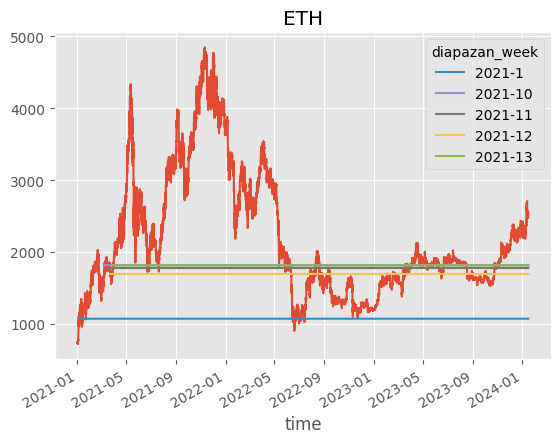

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ax = eth_df['close'].plot()
mid_diapazon_table.iloc[:, :5].plot(ax=ax, title='ETH')

In [17]:
harmonics = pd.DataFrame(index=mid_diapazon_table.columns, columns=list(range(-6, 7)))
n_harmonics = harmonics.shape[1]
for week in mid_diapazon_table.columns:
    for harmonic in harmonics.columns:
        harmonics.loc[week, harmonic] = -harmonic * diapazon[week] + window_high[week]
harmonics = harmonics.astype(float)
harmonics

,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6
diapazan_week,,,,,,,,,,,,,
2021-1,2346.30,2150.40,1954.50,1758.60,1562.70,1366.80,1170.90,975.00,779.10,583.20,387.30,191.40,-4.50
2021-10,2261.21,2193.03,2124.85,2056.67,1988.49,1920.31,1852.13,1783.95,1715.77,1647.59,1579.41,1511.23,1443.05
2021-11,2321.42,2237.85,2154.28,2070.71,1987.14,1903.57,1820.00,1736.43,1652.86,1569.29,1485.72,1402.15,1318.58
2021-12,2269.47,2181.16,2092.85,2004.54,1916.23,1827.92,1739.61,1651.30,1562.99,1474.68,1386.37,1298.06,1209.75
2021-13,2375.61,2289.12,2202.63,2116.14,2029.65,1943.16,1856.67,1770.18,1683.69,1597.20,1510.71,1424.22,1337.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-7,2198.60,2097.70,1996.80,1895.90,1795.00,1694.10,1593.20,1492.30,1391.40,1290.50,1189.60,1088.70,987.80
2023-8,2253.70,2163.80,2073.90,1984.00,1894.10,1804.20,1714.30,1624.40,1534.50,1444.60,1354.70,1264.80,1174.90
2023-9,1982.20,1930.00,1877.80,1825.60,1773.40,1721.20,1669.00,1616.80,1564.60,1512.40,1460.20,1408.00,1355.80


In [18]:
harmonics.iloc[0]

-6    2346.3
-5    2150.4
-4    1954.5
-3    1758.6
-2    1562.7
-1    1366.8
 0    1170.9
 1     975.0
 2     779.1
 3     583.2
 4     387.3
 5     191.4
 6      -4.5
Name: 2021-1, dtype: float64

In [19]:
eth_df = eth_df.dropna()
eth_df

,open,high,low,close,is_diapazon_day,calendar_week,diapazan_week,mid_diapazon,high_diapazon,low_diapazon
time,,,,,,,,,,
2021-01-05 05:00:00+00:00,1004.61,1023.39,975.00,990.02,True,2021-1,2021-1,1072.95,1170.9,975.0
2021-01-05 06:00:00+00:00,990.35,1022.55,980.00,1015.96,True,2021-1,2021-1,1072.95,1170.9,975.0
2021-01-05 07:00:00+00:00,1019.69,1024.01,1001.12,1003.36,True,2021-1,2021-1,1072.95,1170.9,975.0
2021-01-05 08:00:00+00:00,1004.48,1044.95,1004.48,1026.10,True,2021-1,2021-1,1072.95,1170.9,975.0
2021-01-05 09:00:00+00:00,1028.40,1050.60,1024.31,1037.01,True,2021-1,2021-1,1072.95,1170.9,975.0
...,...,...,...,...,...,...,...,...,...,...
2024-01-15 09:00:00+00:00,2511.90,2531.40,2508.00,2526.80,False,2024-3,2024-2,2329.80,2430.9,2228.7
2024-01-15 10:00:00+00:00,2527.00,2539.80,2524.50,2531.80,False,2024-3,2024-2,2329.80,2430.9,2228.7
2024-01-15 11:00:00+00:00,2532.70,2540.90,2530.90,2538.10,False,2024-3,2024-2,2329.80,2430.9,2228.7


/tmp/ipykernel_3859/3194738156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df['ma_5'] = eth_df['close'].ewm(5).mean()
/tmp/ipykernel_3859/3194738156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df['ma_10'] = eth_df['close'].ewm(10).mean()
/tmp/ipykernel_3859/3194738156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

<Axes: xlabel='time'>

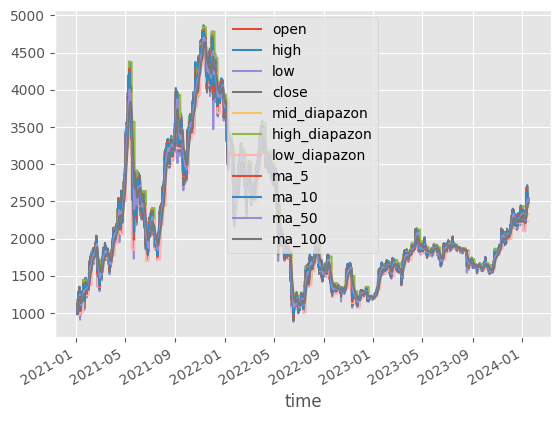

In [20]:
eth_df['ma_5'] = eth_df['close'].ewm(5).mean()
eth_df['ma_10'] = eth_df['close'].ewm(10).mean()
eth_df['ma_50'] = eth_df['close'].ewm(50).mean()
eth_df['ma_100'] = eth_df['close'].ewm(100).mean()
eth_df.plot()

<Axes: ylabel='Frequency'>

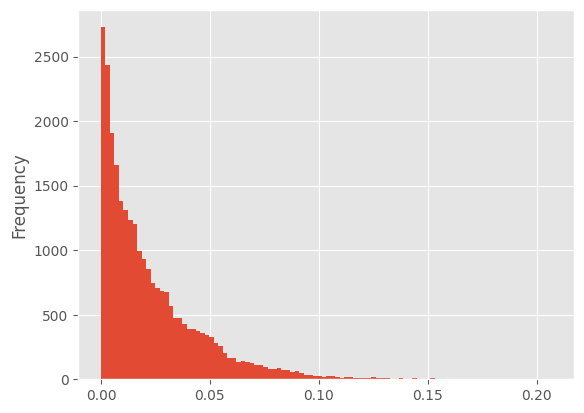

In [21]:
shift = 24
shifterd_price = eth_df['ma_10'].shift(shift)
price_change = ((eth_df['ma_10'].diff(shift)).abs() / shifterd_price)
price_change.plot(kind='hist', bins=100)

In [22]:
is_horizonal_cond =  price_change <= 0.001
eth_df['is_horizontal_cond'] = is_horizonal_cond
is_horizonal_cond.value_counts()

/tmp/ipykernel_3859/989528957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df['is_horizontal_cond'] = is_horizonal_cond


False    25197
True      1327
Name: ma_10, dtype: int64

/tmp/ipykernel_3859/1799043222.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')  # You can choose a different colormap


['2023-47', '2023-48', '2023-49', '2023-50', '2023-51', '2023-52', '2024-1', '2024-2']


<Axes: title={'center': 'ETH'}, xlabel='time'>

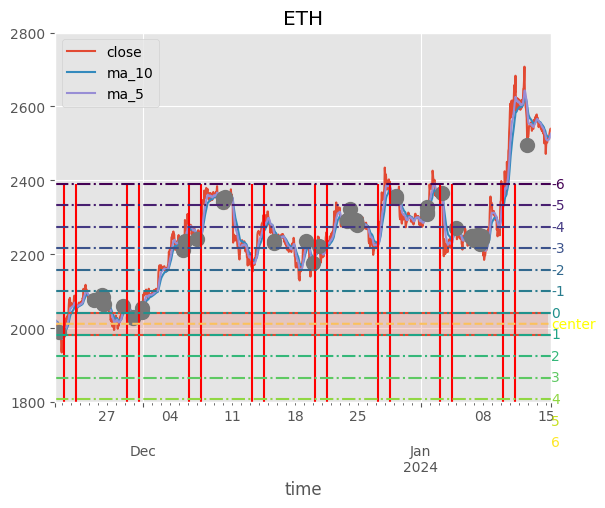

In [23]:
plt.style.use('ggplot')
from matplotlib import cm
import numpy as np

WEEK = '2023-47'
MIN_DATE = eth_df[eth_df['diapazan_week'] == WEEK].index.min()
min_date = mid_diapazon_table[WEEK].dropna().index.min()
max_date = mid_diapazon_table[WEEK].dropna().index.max()

# plot prices
ax = eth_df.loc[MIN_DATE:, ['close', 'ma_10', 'ma_5']].plot(ylim=(1800, 2800))


# plot horizontal otriginal range
dates = pd.date_range(min_date, max_date)
n_days = dates.shape[0]
ax.hlines(window_high[WEEK], min_date, max_date)
ax.hlines(window_low[WEEK], min_date, max_date)
plt.fill_between(dates, [window_high[WEEK]] * n_days, [window_low[WEEK]] * n_days, alpha=0.2)
plt.text(max_date, 
         (window_low[WEEK] + window_high[WEEK]) / 2, 
         'center', color='yellow',
         verticalalignment='center', 
         horizontalalignment='left')

# plot horizontal points
eth_df.loc[eth_df['is_horizontal_cond'], :].loc[MIN_DATE:, 'close'].plot(marker='o',
                                                                         linestyle='', markersize=10)

# diapazon dates
weeks = sorted(eth_df.loc[min_date: max_date, 'diapazan_week'].unique())
print(weeks)

# horizontal lines
for week in weeks:
    start_date_tuesday = eth_df.loc[
        ((eth_df.index.weekday == 2) & (eth_df.index.hour == 5) & (eth_df['diapazan_week'] == week))
    ].index[0]
    end_date_wednesday  = eth_df.loc[
        ((eth_df.index.weekday == 3) & (eth_df.index.hour == 13) & (eth_df['diapazan_week'] == week))
    ].index[0]
    # plot
    ax.vlines(start_date_tuesday, harmonics.loc[WEEK].min(), harmonics.loc[WEEK].max(), 
              linestyle='-', color='red')
    ax.vlines(end_date_wednesday, harmonics.loc[WEEK].min(), harmonics.loc[WEEK].max(), 
              linestyle='-', color='red')


# Choose a colormap and define the number of lines
colormap = cm.get_cmap('viridis')  # You can choose a different colormap
# Generate a list of unique colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, harmonics.shape[1])]

for idx, level in enumerate(harmonics.columns):
    haromonics_levels_week = eth_df['diapazan_week'].map({WEEK: harmonics.loc[WEEK, level]})
    harmonic_level_week = harmonics.loc[WEEK, level]
    ax.hlines(harmonic_level_week, min_date, max_date, color=colors[idx], linestyle='-.')
    
    plt.text(max_date, harmonic_level_week, f'{level}', color=colors[idx],
             verticalalignment='center', horizontalalignment='left')
mid_diapazon_table.loc[MIN_DATE:, WEEK].plot(ax=ax, title='ETH', linestyle='--')

In [24]:
is_horizonal_cond = (eth_df['ma_5'] - eth_df['ma_5'].shift(5)).abs() < 0.0
eth_df['is_horizontal_cond'] = is_horizonal_cond
is_horizonal_cond.value_counts()

/tmp/ipykernel_3859/4134225949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df['is_horizontal_cond'] = is_horizonal_cond


False    26524
Name: ma_5, dtype: int64

In [25]:
eth_df['ma_5'] - eth_df['ma_5'].shift(5)

time
2021-01-05 05:00:00+00:00          NaN
2021-01-05 06:00:00+00:00          NaN
2021-01-05 07:00:00+00:00          NaN
2021-01-05 08:00:00+00:00          NaN
2021-01-05 09:00:00+00:00          NaN
                               ...    
2024-01-15 09:00:00+00:00     5.119026
2024-01-15 10:00:00+00:00     6.599189
2024-01-15 11:00:00+00:00     9.932657
2024-01-15 12:00:00+00:00    12.910548
2024-01-15 13:00:00+00:00    15.375456
Name: ma_5, Length: 26524, dtype: float64

# Connect with 4 previous diapazons

# Add past harmonics

In [26]:
offsets = [1, 2, 3, 4]
offset_cols = {}
offset_cols['offset_cols'] = []
for offset in offsets:
#     new_index = eth_df.index - pd.DateOffset(weeks=offset)
    curr_week = eth_df['diapazan_week'].str.split('-').str[1].astype(int)
    offset_cols['offset_cols'].append(f'offset_{offset}')
    shifted_week = curr_week + offset
    
    start_year_cond = shifted_week <= 0
    
    diff = offset - curr_week
    shifted_week[start_year_cond] = 52 - diff[start_year_cond]
    
    offset_year = eth_df['diapazan_week'].str.split('-').str[0].astype(int)
    offset_year[start_year_cond] = offset_year[start_year_cond] -1
    offset_week = offset_year.astype(str) + '-' + shifted_week.astype(str)
    eth_df[f'offset_{offset}'] = offset_week
eth_df[offset_cols['offset_cols'] + ['diapazan_week', 'is_diapazon_day']]

/tmp/ipykernel_3859/4274788247.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df[f'offset_{offset}'] = offset_week


,offset_1,offset_2,offset_3,offset_4,diapazan_week,is_diapazon_day
time,,,,,,
2021-01-05 05:00:00+00:00,2021-2,2021-3,2021-4,2021-5,2021-1,True
2021-01-05 06:00:00+00:00,2021-2,2021-3,2021-4,2021-5,2021-1,True
2021-01-05 07:00:00+00:00,2021-2,2021-3,2021-4,2021-5,2021-1,True
2021-01-05 08:00:00+00:00,2021-2,2021-3,2021-4,2021-5,2021-1,True
2021-01-05 09:00:00+00:00,2021-2,2021-3,2021-4,2021-5,2021-1,True
...,...,...,...,...,...,...
2024-01-15 09:00:00+00:00,2024-3,2024-4,2024-5,2024-6,2024-2,False
2024-01-15 10:00:00+00:00,2024-3,2024-4,2024-5,2024-6,2024-2,False
2024-01-15 11:00:00+00:00,2024-3,2024-4,2024-5,2024-6,2024-2,False


In [27]:
from collections import defaultdict
offset_cols['harmon_cols'] = defaultdict(list)
for col in offset_cols['offset_cols']:
    offset = col.split('_')[1]
    offset_cols['harmon_cols'][offset].append(f'{col}_high') 
    offset_cols['harmon_cols'][offset].append(f'{col}_low') 
#     eth_df[f'{col}_high'] = eth_df[col].map(window_high)
#     eth_df[f'{col}_low'] = eth_df[col].map(window_low)
    
for col in offset_cols['offset_cols']:
    offset = int(col.split('_')[1])
    for harmonic in harmonics.columns:
        offset_cols['harmon_cols'][offset].append(f'{col}_harmon_{harmonic}') 
        eth_df[f'{col}_harmon_{harmonic}'] = eth_df[col].map(harmonics[harmonic])
eth_df.count()

/tmp/ipykernel_3859/1808364021.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df[f'{col}_harmon_{harmonic}'] = eth_df[col].map(harmonics[harmonic])


open                 26524
high                 26524
low                  26524
close                26524
is_diapazon_day      26524
                     ...  
offset_4_harmon_2    24187
offset_4_harmon_3    24187
offset_4_harmon_4    24187
offset_4_harmon_5    24187
offset_4_harmon_6    24187
Length: 71, dtype: int64

In [28]:
week_number_within_month = (
    (eth_df.index.tz_localize(None) - pd.to_datetime(eth_df.index.to_period("M").start_time)).days // 7) + 1

eth_df['calendar_week_number_within_month'] = week_number_within_month
eth_df['calendar_week_number_within_month'].value_counts()

/home/duwlat/.pyenv/versions/3.8.10/envs/cpu-pytorch-env/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/tmp/ipykernel_3859/3572180615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df['calendar_week_number_within_month'] = week_number_within_month


2    6214
1    6112
3    6062
4    6048
5    2088
Name: calendar_week_number_within_month, dtype: int64

In [29]:
# BECAUSE first element in list usually is first met by algorithm
diapazan_week2week_month = (
    eth_df.groupby(['diapazan_week'])['calendar_week_number_within_month'].unique().str[0]
)
eth_df['diapazan_week_number_within_month'] = eth_df['diapazan_week'].map(diapazan_week2week_month)
eth_df['diapazan_week_number_within_month']

/tmp/ipykernel_3859/3431177761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df['diapazan_week_number_within_month'] = eth_df['diapazan_week'].map(diapazan_week2week_month)


time
2021-01-05 05:00:00+00:00    1
2021-01-05 06:00:00+00:00    1
2021-01-05 07:00:00+00:00    1
2021-01-05 08:00:00+00:00    1
2021-01-05 09:00:00+00:00    1
                            ..
2024-01-15 09:00:00+00:00    2
2024-01-15 10:00:00+00:00    2
2024-01-15 11:00:00+00:00    2
2024-01-15 12:00:00+00:00    2
2024-01-15 13:00:00+00:00    2
Name: diapazan_week_number_within_month, Length: 26524, dtype: int64

In [30]:
# eth_df['diapazan_week_number_within_month'] = eth_df.loc[eth_df['is_diapazon_day'], 
#                                                          'calendar_week_number_within_month']
# eth_df['diapazan_week_number_within_month'] = (
#     eth_df['diapazan_week_number_within_month'].fillna(method='ffill')
# )
# eth_df['diapazan_week_number_within_month'].count() - eth_df['diapazan_week_number_within_month'].shape[0]

# Add past harmonics order

In [31]:
diapazan_week2weeknumber = eth_df.drop_duplicates(subset=[
    'diapazan_week', 'diapazan_week_number_within_month'
]).set_index('diapazan_week')['diapazan_week_number_within_month']
diapazan_week2weeknumber.dropna().shape, len(diapazan_week2weeknumber.to_dict())

((158,), 158)

In [32]:
offset_cols['offset_n_week_columns'] = []
for offset in offsets:
    offset_cols['offset_n_week_columns'].append(f'offset_{offset}_week')
    eth_df[f'offset_{offset}_week'] = eth_df[f'offset_{offset}'].map(diapazan_week2weeknumber)
eth_df[offset_cols['offset_n_week_columns']]

/tmp/ipykernel_3859/21154119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df[f'offset_{offset}_week'] = eth_df[f'offset_{offset}'].map(diapazan_week2weeknumber)


,offset_1_week,offset_2_week,offset_3_week,offset_4_week
time,,,,
2021-01-05 05:00:00+00:00,2.0,3.0,4.0,1.0
2021-01-05 06:00:00+00:00,2.0,3.0,4.0,1.0
2021-01-05 07:00:00+00:00,2.0,3.0,4.0,1.0
2021-01-05 08:00:00+00:00,2.0,3.0,4.0,1.0
2021-01-05 09:00:00+00:00,2.0,3.0,4.0,1.0
...,...,...,...,...
2024-01-15 09:00:00+00:00,NaN,NaN,NaN,NaN
2024-01-15 10:00:00+00:00,NaN,NaN,NaN,NaN
2024-01-15 11:00:00+00:00,NaN,NaN,NaN,NaN


# Examine Future picrs


In [33]:
offset_cols['is_in_harmonics_cols'] = {}
margin = 0.02
for offset in offsets:
    print(offset)
    offset_cols['is_in_harmonics_cols'][offset] = []
    for harmon in harmonics:
        if min(harmonics) < harmon < max(harmonics):
            harmon_cond = (
                (eth_df[f'offset_{offset}_harmon_{harmon+1}'] <= eth_df['high'] ) 
                & (eth_df['high'] <= eth_df[f'offset_{offset}_harmon_{harmon}'])
            )
        elif harmon == min(harmonics):
            harmon_cond = (
                (eth_df['high'] >= eth_df[f'offset_{offset}_harmon_{harmon}'])
            )
        elif harmon == max(harmonics):
            harmon_cond = (
                (eth_df['high'] <= eth_df[f'offset_{offset}_harmon_{harmon}'])
            )
            
        offset_cols['is_in_harmonics_cols'][offset].append(f'price_offset_{offset}_{harmon}')
        eth_df[f'price_offset_{offset}_{harmon}'] = harmon_cond
eth_df[offset_cols['is_in_harmonics_cols'][offset]].any(axis=1).value_counts()

1
2
3
4


/tmp/ipykernel_3859/307488984.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df[f'price_offset_{offset}_{harmon}'] = harmon_cond


True     23785
False     2739
dtype: int64

In [34]:
QUERY_N_WEEK = 4
QUERY_OFFSET = 4
cond_offset = (
    (eth_df[f'offset_{QUERY_OFFSET}_week'] == QUERY_N_WEEK)
)
is_in_price_range_cols = offset_cols['is_in_harmonics_cols'][QUERY_OFFSET]
harmonics_cols = offset_cols['is_in_harmonics_cols'][QUERY_OFFSET]
subset_df = eth_df[is_in_price_range_cols + ['high']].copy()
subset_df = subset_df.sort_index()
subset_df

,price_offset_4_-6,price_offset_4_-5,price_offset_4_-4,price_offset_4_-3,price_offset_4_-2,price_offset_4_-1,price_offset_4_0,price_offset_4_1,price_offset_4_2,price_offset_4_3,price_offset_4_4,price_offset_4_5,price_offset_4_6,high
time,,,,,,,,,,,,,,
2021-01-05 05:00:00+00:00,False,False,False,False,False,False,False,False,True,False,False,False,False,1023.39
2021-01-05 06:00:00+00:00,False,False,False,False,False,False,False,False,True,False,False,False,False,1022.55
2021-01-05 07:00:00+00:00,False,False,False,False,False,False,False,False,True,False,False,False,False,1024.01
2021-01-05 08:00:00+00:00,False,False,False,False,False,False,False,False,True,False,False,False,False,1044.95
2021-01-05 09:00:00+00:00,False,False,False,False,False,False,False,False,True,False,False,False,False,1050.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15 09:00:00+00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,2531.40
2024-01-15 10:00:00+00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,2539.80
2024-01-15 11:00:00+00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,2540.90


In [35]:
def get_harmonics_range(search_price: float, 
                        previous_price: float, 
                        diapozan_week: 'str', 
                        margin_of_error: float = 0.02):
    
    sorted_series = harmonics.loc[diapozan_week].sort_values().copy()
    if previous_price >= search_price:
        sorted_series = sorted_series * (1 + margin_of_error)
    else:
        sorted_series = sorted_series * (1 - margin_of_error)
    index = sorted_series.searchsorted(search_price)
    
    # Get the minimum and maximum thresholds
    min_threshold = index-1
    max_threshold = index
    harmonics_range = sorted_series.iloc[min_threshold: max_threshold+1].index
    if not harmonics_range.empty:
        
        return harmonics_range[0] - 1
    return harmonics.columns.max()

In [36]:
def remove_duplicates(input_string):
    cleaned_path = []
    last_char = None

    for char in input_string:
        if char != last_char:
            cleaned_path.append(char)
            last_char = char

    return ''.join(cleaned_path)

# Example
input_str = '1233333111'
output_str = remove_duplicates(input_str)
output_str

'1231'

In [37]:
week_number2diapazonweek = defaultdict(list)
search_df = eth_df[['diapazan_week_number_within_month', 'diapazan_week']].drop_duplicates()
week_numbers = eth_df['diapazan_week_number_within_month'].unique().tolist()

for week_number in week_numbers:
    weeks = (
        search_df.loc[search_df['diapazan_week_number_within_month'] == week_number, 'diapazan_week']
    )
    week_number2diapazonweek[week_number] = weeks.values.tolist()
len(week_number2diapazonweek)

5

In [38]:
def get_week2paths(window: int, granularity: str, past_shift: int):
    """
        In: window - int - number of weeks forward to look forward
            granularity - str - at which frequency to look forward. e.g. 1d, 1w, 1h.
            past_shift - int - on how many "granularity" to shift prices from the past
                               to get direction of prices
        Out: at which diapazon look
    """
    
    week2path2count  = {week_number: {} for week_number in week_numbers}
    diapazons_week = harmonics.index

    for week_number, diapazons_weeks in week_number2diapazonweek.items():
        for diapozon_week in diapazons_weeks:
            path = ''
            harmonic_levels = harmonics.loc[diapozon_week]

            start_date = eth_df[
                (eth_df['diapazan_week'] == diapozon_week) & (~eth_df['is_diapazon_day'])
            ].index.min()
            end_date = start_date + pd.Timedelta(window, unit='w')

            future_prices = eth_df.loc[start_date: end_date].resample(granularity)['close'].last()
            past_prices = future_prices.shift(past_shift)
            for past_price, curr_price in zip(past_prices, future_prices):
                if past_price is None:
                    continue
                
                harmonic_number = get_harmonics_range(curr_price, past_price, diapozon_week)
                path += f'{harmonic_number}+'

            path = path.split('+')
            week2path2count[week_number][diapozon_week] = path
    return week2path2count

In [39]:
%%time
week2path2count = get_week2paths(4, granularity='1h', past_shift=3)
len(week2path2count)

CPU times: user 19.7 s, sys: 65.6 ms, total: 19.8 s
Wall time: 19.7 s


5

In [40]:
path2count = pd.Series(week2path2count[2])
path2count.head()

2021-2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...
2021-6     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, ...
2021-10    [-1, -1, -1, 1, 0, 0, -1, -1, -1, -1, -1, 0, 1...
2021-15    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1,...
2021-19    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1...
dtype: object

In [41]:
pathes_df = (
    path2count.apply(pd.Series)
        .replace('', np.nan)
        .dropna(how='all', axis=1)
        .astype(float)
        .dropna(axis=0)
)
pathes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
2021-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-5.0,-5.0,-5.0,-5.0,-4.0,-5.0,-4.0,-5.0,-5.0
2021-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
2021-10,-1.0,-1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-5.0,-5.0,-4.0,-3.0,-4.0,-5.0,-5.0,-4.0,-5.0,-3.0
2021-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-6.0,-6.0,-7.0
2021-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


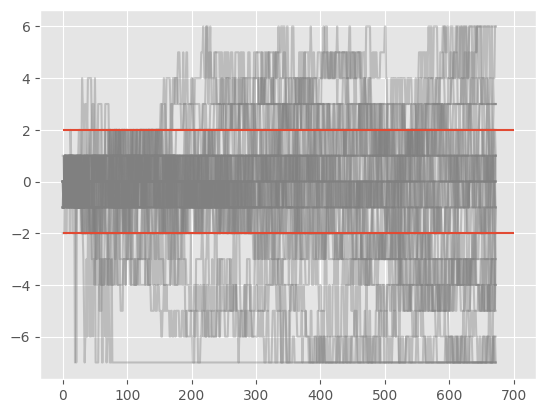

In [42]:
for idx in range(pathes_df.shape[0]):
    pathes_df.T.iloc[:, idx].plot(alpha=0.4, color='grey')
plt.hlines(2, 0, 700)
plt.hlines(-2, 0, 700)

In [43]:
harmonic2freq = {}
for harmonic in range(0, 7):
    is_in_middles = (pathes_df <= harmonic) & (pathes_df >= -harmonic)
    freq = is_in_middles.sum().sum() / pathes_df.count().sum()
    harmonic2freq[harmonic] = freq
harmonic2freq = pd.Series(harmonic2freq)
harmonic2freq

0    0.236544
1    0.562407
2    0.734398
3    0.828050
4    0.882326
5    0.917451
6    0.941060
dtype: float64

# Percentage in each harmonic for each week

In [45]:
def get_total_weeks_pathes(week2path2count):
    total_pathes_df = pd.DataFrame()
    for week, path2count_dict in week2path2count.items():
        path2count_week = pd.Series(path2count_dict)
        pathes_df_week = (
            path2count_week.apply(pd.Series)
                .replace('', np.nan)
                .dropna(how='all', axis=1)
                .astype(float)
                .dropna(axis=0)
        )
        total_pathes_df = pd.concat([pathes_df_week, total_pathes_df], axis=0)
    total_pathes_df = total_pathes_df.sort_index()
#     total_pathes_df = total_pathes_df.reset_index(drop=True)
    return total_pathes_df
total_pathes_df = get_total_weeks_pathes(week2path2count)
print(total_pathes_df.shape)
display(total_pathes_df)

(154, 673)


,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
2021-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2021-10,-1.0,-1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-5.0,-5.0,-4.0,-3.0,-4.0,-5.0,-5.0,-4.0,-5.0,-3.0
2021-11,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-4.0,-4.0,-5.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0
2021-12,-1.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,...,-5.0,-4.0,-4.0,-6.0,-6.0,-6.0,-6.0,-6.0,-7.0,-5.0
2021-13,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-50,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,0.0
2023-6,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
2023-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,-3.0
2023-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0


In [46]:
week_number_pathes_df = total_pathes_df.index.map(diapazan_week2weeknumber)

week_number2frac = pd.DataFrame()
for week, group in total_pathes_df.groupby(week_number_pathes_df):
    fracs = pd.DataFrame()
    for idx, row in group.iterrows():
        perc_counts = row.value_counts(normalize=False)
        fracs = pd.concat([perc_counts.to_frame(), fracs], axis=1).fillna(0)
    fracs = fracs.sum(axis=1)
    fracs.name = week
    
    week_number2frac = pd.concat([week_number2frac, fracs], axis=1)
week_number2frac

,1,2,3,4,5
-7.0,1069.0,1428.0,898.0,944.0,282.0
-6.0,392.0,429.0,381.0,530.0,214.0
-5.0,491.0,560.0,542.0,633.0,281.0
-4.0,698.0,748.0,926.0,898.0,292.0
-3.0,1085.0,974.0,1330.0,1328.0,352.0
-2.0,1892.0,1873.0,2024.0,2465.0,367.0
-1.0,3807.0,3860.0,3503.0,5040.0,905.0
0.0,4919.0,5731.0,5080.0,6410.0,1548.0
1.0,3845.0,4035.0,3724.0,2760.0,1781.0
2.0,2387.0,2294.0,2287.0,1094.0,729.0


In [47]:
def make_pretty(styler, vmin, vmax):
    styler.format("{:.3f}")
    styler.background_gradient(axis=None, vmin=vmin, vmax=vmax, cmap="YlGnBu")
    return styler
week_number2frac = week_number2frac / week_number2frac.sum(axis=0).values[None, :]
week_number2frac.style.pipe(make_pretty, 0, .3)

,1,2,3,4,5
-7.0,0.044,0.059,0.038,0.040,0.035
-6.0,0.016,0.018,0.016,0.023,0.026
-5.0,0.020,0.023,0.023,0.027,0.035
-4.0,0.029,0.031,0.039,0.038,0.036
-3.0,0.045,0.040,0.056,0.056,0.044
-2.0,0.078,0.077,0.086,0.105,0.045
-1.0,0.157,0.159,0.149,0.214,0.112
0.0,0.203,0.237,0.216,0.272,0.192
1.0,0.159,0.167,0.158,0.117,0.221
2.0,0.099,0.095,0.097,0.046,0.090


In [48]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
z_scores_frac = scaler.fit_transform(week_number2frac)
z_scores_frac = pd.DataFrame(z_scores_frac, index=week_number2frac.index, columns=week_number2frac.columns)
z_scores_frac.style.pipe(make_pretty, -2, 2)

,1,2,3,4,5
-7.0,-0.469,-0.186,-0.553,-0.405,-0.605
-6.0,-0.949,-0.800,-0.918,-0.632,-0.745
-5.0,-0.879,-0.720,-0.804,-0.576,-0.607
-4.0,-0.732,-0.604,-0.533,-0.430,-0.585
-3.0,-0.458,-0.465,-0.249,-0.194,-0.462
-2.0,0.114,0.088,0.241,0.429,-0.431
-1.0,1.472,1.310,1.284,1.842,0.674
0.0,2.260,2.460,2.396,2.594,1.993
1.0,1.499,1.417,1.440,0.591,2.472
2.0,0.465,0.347,0.426,-0.323,0.312


In [49]:
diffs = week_number2frac - week_number2frac.mean(axis=1).values[:, None]
diffs.style.pipe(make_pretty, -0.05, 0.05)

,1,2,3,4,5
-7.0,0.001,0.016,-0.005,-0.003,-0.008
-6.0,-0.004,-0.002,-0.004,0.003,0.007
-5.0,-0.005,-0.002,-0.003,0.001,0.009
-4.0,-0.006,-0.004,0.005,0.003,0.002
-3.0,-0.003,-0.008,0.008,0.008,-0.005
-2.0,-0.000,-0.001,0.008,0.026,-0.033
-1.0,-0.001,0.001,-0.010,0.056,-0.046
0.0,-0.021,0.013,-0.008,0.048,-0.032
1.0,-0.006,0.002,-0.006,-0.047,0.056
2.0,0.013,0.009,0.012,-0.039,0.005


## 80% of all movement happens inside -2:+2 harmonics range

# Find Probability of getting maxes

In [50]:
min_start = -2
max_end = -6
gap_days_index = 3

row_increasing_patterns = []
for idx, row in pathes_df.iterrows():
    
    # FILTER OUT ROWS WITHOUT NEEDED VALUES
    if min_start < max_end:

        row = row[(row >= min_start) & (row <= max_end)]
    else:
        row = row[(row <= min_start) & (row >= max_end)]
    
    
    if (not row.empty) and (max_end in row.values):
        
        # DISJOIN ROWS BY TIME
        index = pd.Series(row.index)
        start_indices = index[index > (index.shift(1) + gap_days_index)].values
        index_of_start_indices = index[index > (index.shift(1) + gap_days_index)].index.values

        for idx, start_index in enumerate(start_indices):
            if idx == len(start_indices) -1:
                part_row = row[index_of_start_indices[idx]:]
            else:
                part_row = row[index_of_start_indices[idx]: index_of_start_indices[idx+1]]
            
            # FILTER OUT ONLY INCREASING PATERNS
            if max_end in part_row.values:
                break
                prev_harmonic = None
                start_index = 0
                part_row = part_row.values
                min_harmonic = part_row[0]

                for idx, harmonic_level in enumerate(part_row):
                    if harmonic_level == max_end and prev_harmonic != max_end:
                        increasing_harmonic = row_increasing[start_index: idx+1]
                        if len(increasing_harmonic) > 1 and part_row[start_index] != harmonic_level:
                            row_increasing_patterns.append(increasing_harmonic)
                        start_index = idx+1
                        min_harmonic = part_row[start_index]

                    if harmonic_level < min_harmonic:
                        min_harmonic = harmonic_level
                        start_index = idx + 1
                    prev_harmonic = harmonic_level
            
part_row = part_row.values
row_increasing_patterns = pd.DataFrame(row_increasing_patterns)
row_increasing_patterns

""


array([-3., -3., -3., -3., -3., -3., -3., -4., -4., -4., -4., -4., -4.,
       -2., -2., -2., -2., -4., -4., -4., -2., -2., -2., -4., -2., -2.,
       -4., -4., -5., -5., -4., -5., -5., -5., -5., -5., -5., -2., -2.,
       -2., -5., -6., -6., -6., -4., -6., -6., -6., -6., -4., -4., -4.,
       -3., -4., -6., -6., -3., -3., -6., -6., -6., -6., -6., -4., -4.,
       -3., -4., -6., -6., -6., -4., -6., -4., -4., -4., -3., -3., -3.,
       -5., -5., -3., -5., -5., -6., -6., -3., -6., -6., -5., -3., -3.,
       -3., -6., -6., -6., -6., -6., -6., -6., -6., -6., -4., -4.])

[-2. -2. -2. -4. -4. -4. -2. -2. -2. -4. -2. -2. -4. -4. -5. -5. -4. -5.
 -5. -5. -5. -5. -5. -2. -2. -2. -5. -6.]
[-6.]
[-4. -6.]
[-3. -6.]
[-4. -6.]
[-6.]
[-3. -3. -5. -5. -3. -5. -5. -6.]
[-6.]
[-3. -3. -6.]


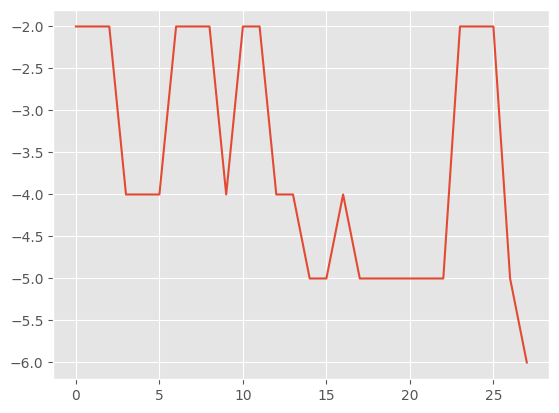

In [51]:
prev_harmonic = None
increasing_harmonics = []
start_index = 0
display(part_row)
min_harmonic = part_row[0]
for idx, harmonic_level in enumerate(part_row):
    if harmonic_level == max_end and prev_harmonic != max_end:
        increasing_harmonic = part_row[start_index: idx+1]
        print(increasing_harmonic)
        if len(increasing_harmonic) > 1 and part_row[start_index] == min_start:
            increasing_harmonics.append(increasing_harmonic)
        start_index = idx+1
        if start_index < len(part_row)-1:
            min_harmonic = part_row[start_index]
    
    # find the smallest harmonic start
    if min_start < max_end:
        if harmonic_level < min_harmonic:
            min_harmonic = harmonic_level
            start_index = idx + 1
    else:
        if harmonic_level > min_harmonic:
            min_harmonic = harmonic_level
            start_index = idx + 1
    prev_harmonic = harmonic_level
    
for row_plot in increasing_harmonics:
    pd.Series(row_plot).plot()

In [52]:
all_higher_than_treshold_patterns = []
for idx, row in pathes_df.iterrows():
    if min_start < max_end:
        row = row[(row >= min_start)]#.tolist()
    else:
        row = row[(row <= min_start)]#.tolist()

    if not row.empty:
        index = pd.Series(row.index)
        start_indices = index[index > (index.shift(1) + gap_days_index)].values
        index_of_start_indices = index[index > (index.shift(1) + gap_days_index)].index.values

        for idx, start_index in enumerate(start_indices):
            if idx == len(start_indices) -1:
                part_row = row[index_of_start_indices[idx]:].values
            else:
                part_row = row[index_of_start_indices[idx]: index_of_start_indices[idx+1]].values

            prev_harmonic = None
            start_index = 0
            min_harmonic = part_row[0]
            len_row = len(part_row)

            for idx, harmonic_level in enumerate(part_row):
                if (harmonic_level == min_start and prev_harmonic != min_start) or idx == len_row-1:
                    harmonics_oscilating = part_row[start_index: idx+1]
                    
                    if len(harmonics_oscilating) > 1 and part_row[start_index] == min_start:
                        all_higher_than_treshold_patterns.append(harmonics_oscilating)
                    start_index = idx+1
                prev_harmonic = harmonic_level
# for row_plot in increasing_harmonics:
#     pd.Series(row_plot).plot()
    
all_higher_than_treshold_patterns = pd.DataFrame(all_higher_than_treshold_patterns)
all_higher_than_treshold_patterns

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-3.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.0,-2.0,-3.0,-3.0,-2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,-2.0,-2.0,-3.0,-3.0,-3.0,-2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

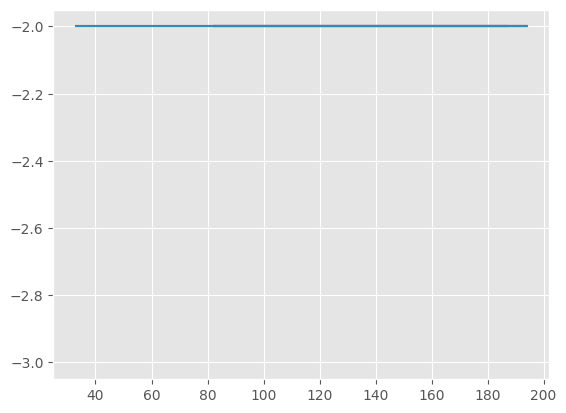

In [53]:
all_higher_than_treshold_patterns.sample(5, axis=0).plot(legend=None)
# plt.legend(False)

In [54]:
def get_increasing_patterns(df, min_start, max_end, gap_days_index: int = 3):
    
# VERSION 1
#     row_increasing_patterns = []
#     for idx, row in pathes_df.iterrows():
#         if min_start < max_end:

#             row_increasing = row[(row >= min_start) & (row <= max_end)].tolist()
#         else:
#             row_increasing = row[(row <= min_start) & (row >= max_end)].tolist()

#         if row_increasing and max_end in row_increasing:
            
#             slope = (row_increasing[-1] - row_increasing[0]) / len(row_increasing)
                
#             if min_start < max_end and slope > 0:
#                 row_increasing_patterns.append(row_increasing)
#             elif min_start > max_end and slope < 0:
#                 row_increasing_patterns.append(row_increasing)
#     row_increasing_patterns = pd.DataFrame(row_increasing_patterns)

#     row_increasing_patterns = []
#     for idx, row in df.iterrows():
#         if min_start < max_end:
#             row_increasing = row[(row >= min_start) & (row <= max_end)]
#         else:
#             row_increasing = row[(row <= min_start) & (row >= max_end)]


# VERSION 2
#         if (not row_increasing.empty) and (max_end in row_increasing.values):
#             index = pd.Series(row_increasing.index)
#             start_indices = index[index > (index.shift(1) + gap_days_index)].values
#             index_of_start_indices = index[index > (index.shift(1) + gap_days_index)].index.values
#             for idx, start_index in enumerate(start_indices):
#                 if idx == len(start_indices) -1:
#                     part_row = row_increasing[index_of_start_indices[idx]:]
#                 else:
#                     part_row = row_increasing[index_of_start_indices[idx]: index_of_start_indices[idx+1]]
#                 if max_end in part_row.values:
#                     row_increasing_patterns.append(part_row)
#     row_increasing_patterns = pd.DataFrame(row_increasing_patterns)


    # VERSION 3
    row_increasing_patterns = []
    for idx, row in df.iterrows():
    
        # FILTER OUT ROWS WITHOUT NEEDED VALUES
        if min_start < max_end:

            row = row[(row >= min_start) & (row <= max_end)]
        else:
            row = row[(row <= min_start) & (row >= max_end)]


        if (not row.empty) and (max_end in row.values):

            # DISJOIN ROWS BY TIME
            index = pd.Series(row.index)
            start_indices = index[index > (index.shift(1) + gap_days_index)].values
            index_of_start_indices = index[index > (index.shift(1) + gap_days_index)].index.values

            for idx, start_index in enumerate(start_indices):
                if idx == len(start_indices) -1:
                    part_row = row[index_of_start_indices[idx]:]
                else:
                    part_row = row[index_of_start_indices[idx]: index_of_start_indices[idx+1]]

                # FILTER OUT ONLY INCREASING PATERNS
                if max_end in part_row.values and len(part_row) > 1:
                    prev_harmonic = None
                    start_index = 0
                    part_row = part_row.values
                    min_harmonic = part_row[0]

                    for idx, harmonic_level in enumerate(part_row):
                        if harmonic_level == max_end and prev_harmonic != max_end:
                            increasing_harmonic = row[start_index: idx+1]
                            if len(increasing_harmonic) > 1 and part_row[start_index] == min_start:
                                row_increasing_patterns.append(increasing_harmonic)
                            start_index = idx+1
                            if start_index < len(part_row)-1:
                                min_harmonic = part_row[start_index]

                        # find the smallest harmonic start
                        if min_start < max_end:
                            if harmonic_level < min_harmonic:
                                min_harmonic = harmonic_level
                                start_index = idx + 1
                        else:
                            if harmonic_level > min_harmonic:
                                min_harmonic = harmonic_level
                                start_index = idx + 1
                        prev_harmonic = harmonic_level
    row_increasing_patterns = pd.DataFrame(row_increasing_patterns)
    return row_increasing_patterns

In [55]:
def get_percent_increasing(df, min_start, max_end):
    row_increasing_patterns = get_increasing_patterns(df, min_start, max_end)
    
    # VERSION 1
#     all_higher_than_treshold_patterns = []
#     for idx, row in pathes_df.iterrows():
#         if min_start < max_end:
#             row_higher = row[(row >= min_start)].tolist()
#         else:
#             row_higher = row[(row <= min_start)].tolist()

#         if row_higher:
#             all_higher_than_treshold_patterns.append(row_higher)
#     all_higher_than_treshold_patterns = pd.DataFrame(all_higher_than_treshold_patterns)


    # VERSION 2
    all_higher_than_treshold_patterns = []
    for idx, row in df.iterrows():
        if min_start < max_end:
            row = row[(row >= min_start)]#.tolist()
        else:
            row = row[(row <= min_start)]#.tolist()

        if not row.empty:
            index = pd.Series(row.index)
            start_indices = index[index > (index.shift(1) + gap_days_index)].values
            index_of_start_indices = index[index > (index.shift(1) + gap_days_index)].index.values

            for idx, start_index in enumerate(start_indices):
                if idx == len(start_indices) -1:
                    part_row = row[index_of_start_indices[idx]:].values
                else:
                    part_row = row[index_of_start_indices[idx]: index_of_start_indices[idx+1]].values

                prev_harmonic = None
                start_index = 0
                min_harmonic = part_row[0]
                len_row = len(part_row)

                for idx, harmonic_level in enumerate(part_row):
                    if (harmonic_level == min_start and prev_harmonic != min_start) or idx == len_row-1:
                        harmonics_oscilating = part_row[start_index: idx+1]

                        if len(harmonics_oscilating) > 1 and part_row[start_index] == min_start:
                            all_higher_than_treshold_patterns.append(harmonics_oscilating)
                        start_index = idx+1
                    prev_harmonic = harmonic_level
    all_higher_than_treshold_patterns = pd.DataFrame(all_higher_than_treshold_patterns)
    
    probability_pattern = row_increasing_patterns.shape[0] / all_higher_than_treshold_patterns.shape[0]
    return probability_pattern

In [56]:
def first_high_value(x):
    x = x.dropna()
    if x.empty:
        return None
    return x.index[0]

# SEARCH FOR different weeks

In [57]:
start2end_df_global = pd.DataFrame()
for week, path2count_dict in week2path2count.items():
    path2count = pd.Series(path2count_dict)
    path2count = path2count.copy()
    
    pathes_df = (
        path2count.apply(pd.Series)
            .replace('', np.nan)
            .dropna(how='all', axis=1)
            .astype(float)
            .dropna(axis=0)
    )
    
    start2end_pob = {}
    start2end_len = {}
    start2end_len_std = {}
    start2end_counts = {}

    MAX_END = 6
    for min_start in range(1, 5):
        row_increasing_patterns = get_increasing_patterns(pathes_df, min_start, MAX_END)
        len_till_end = row_increasing_patterns[row_increasing_patterns >= MAX_END-1].apply(first_high_value, 
                                                                                           axis=1)
        len_till_end_mean = len_till_end.mean()
        len_till_end_std = len_till_end.std()
        probability_pattern = get_percent_increasing(pathes_df, min_start, MAX_END)
        start2end_pob[min_start] = probability_pattern
        start2end_len[min_start] = len_till_end_mean
        start2end_len_std[min_start] = len_till_end_std
        start2end_counts[min_start] = row_increasing_patterns.shape[0]

    start2end_pob = pd.Series(start2end_pob)
    start2end_len = pd.Series(start2end_len)
    start2end_len_std = pd.Series(start2end_len_std).round(2)
    start2end_counts = pd.Series(start2end_counts)
    
    # create 
    start2end_df_start = pd.DataFrame.from_dict({'prob': start2end_pob, 
                                           'len_hours': start2end_len, 
                                           'count': start2end_counts,
                                           'len_hours_std': start2end_len_std})
    start2end_df_start['len_days'] = (start2end_df_start['len_hours'] / 24).round(2)
    start2end_df_start['end_harmonic'] = MAX_END


    start2end_pob = {}
    start2end_len = {}
    start2end_len_std = {}
    start2end_counts = {}
    MAX_END = -6
    for min_start in range(-1, -5, -1):
        row_increasing_patterns = get_increasing_patterns(pathes_df, min_start, MAX_END)

        len_till_end = row_increasing_patterns[row_increasing_patterns <= MAX_END+1].apply(
            first_high_value, axis=1)
        len_till_end_mean = len_till_end.mean()
        len_till_end_std = len_till_end.std()
        probability_pattern = get_percent_increasing(pathes_df, min_start, MAX_END)
        start2end_pob[min_start] = probability_pattern
        start2end_len[min_start] = len_till_end_mean
        start2end_len_std[min_start] = len_till_end_std
        start2end_counts[min_start] = row_increasing_patterns.shape[0]

#     start2end_pob = pd.Series(start2end_pob)
#     start2end_len = pd.Series(start2end_len)
#     start2end_len_std = pd.Series(start2end_len_std).round(2)
#     start2end_counts = pd.Series(start2end_counts)

    start2end_df_neg = pd.DataFrame.from_dict({'prob': start2end_pob, 
                                           'len_hours': start2end_len, 
                                           'count': start2end_counts,
                                           'len_hours_std': start2end_len_std})
    start2end_df_neg['len_days'] = (start2end_df_neg['len_hours'] / 24).round(2)
    start2end_df_neg['end_harmonic'] = MAX_END
    start2end_df = pd.concat([start2end_df_start, start2end_df_neg], axis=0)
    
#     print
#     start2end_df.index.name = 'start_harmonic'
    start2end_df = start2end_df.reset_index()
    
    start2end_df = start2end_df.rename(columns={'index': 'start_harmonic'})
    start2end_df['week_diapazon'] = week
    
    start2end_df_global = pd.concat([start2end_df_global, start2end_df], axis=0)
start2end_df_global = start2end_df_global.reset_index(drop=True)
start2end_df_global

,start_harmonic,prob,len_hours,count,len_hours_std,len_days,end_harmonic,week_diapazon
0,1,0.005803,64.000000,3,NaN,2.67,6,1
1,2,0.019108,128.333333,6,60.580000,5.35,6,1
2,3,0.041322,86.666667,5,39.260000,3.61,6,1
3,4,0.293651,354.486486,37,153.260000,14.77,6,1
4,-1,0.011788,80.000000,6,55.425626,3.33,-6,1
5,-2,0.042636,234.000000,11,186.685565,9.75,-6,1
6,-3,0.132184,189.550000,23,186.943412,7.90,-6,1
7,-4,0.144144,366.142857,16,221.504943,15.26,-6,1
8,1,0.008734,316.000000,4,NaN,13.17,6,2
9,2,0.026316,336.500000,7,222.740000,14.02,6,2


In [71]:
start2end_df_global[start2end_df_global['start_harmonic'] == -4]

,start_harmonic,prob,len_hours,count,len_hours_std,len_days,end_harmonic,week_diapazon
7,-4,0.144144,366.142857,16,221.504943,15.26,-6,1
15,-4,0.144068,213.083333,17,98.255195,8.88,-6,2
23,-4,0.165354,221.687500,21,67.246530,9.24,-6,3
31,-4,0.269504,211.285714,38,86.375518,8.80,-6,4
39,-4,0.461538,202.384615,24,75.537561,8.43,-6,5


In [72]:
start_harmonic_prob_df = pd.pivot_table(start2end_df_global, index='start_harmonic', columns='week_diapazon',
               values='prob', aggfunc='last')
start_harmonic_prob_df.style.pipe(make_pretty, 0, 0.3)

week_diapazon,1,2,3,4,5
start_harmonic,,,,,
-4,0.144,0.144,0.165,0.270,0.462
-3,0.132,0.083,0.031,0.030,0.212
-2,0.043,0.031,0.030,0.020,0.095
-1,0.012,0.012,0.016,0.010,0.022
1,0.006,0.009,0.008,0.012,0.009
2,0.019,0.026,0.017,0.020,0.017
3,0.041,0.047,0.050,0.067,0.042
4,0.294,0.308,0.089,0.211,0.104


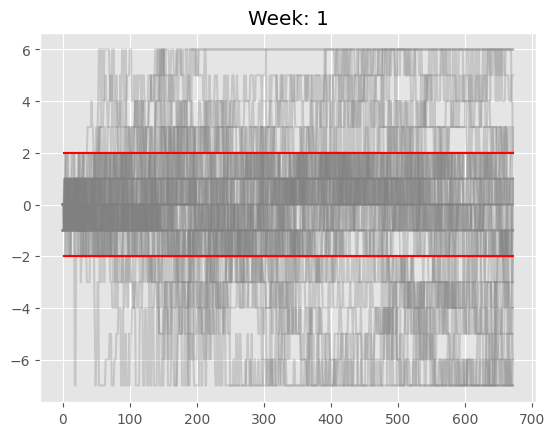

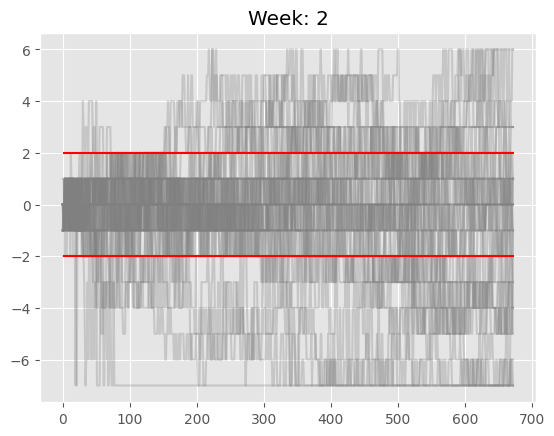

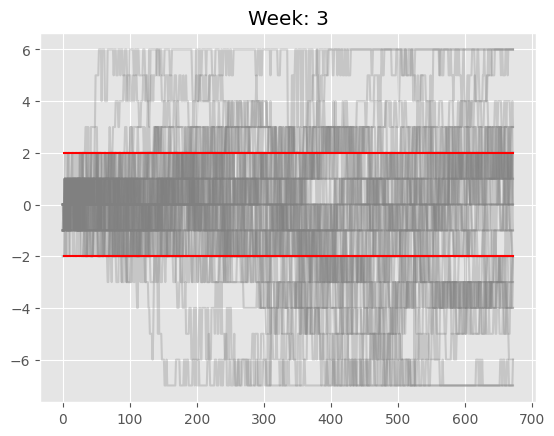

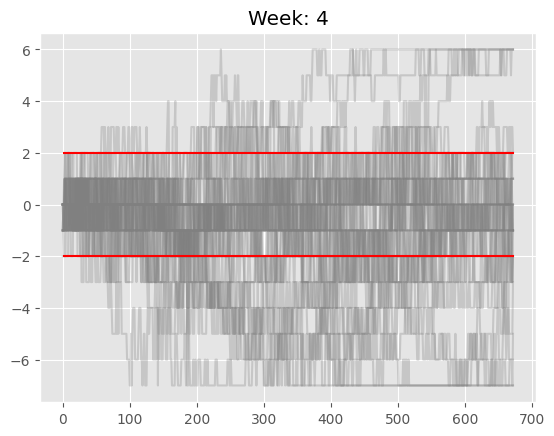

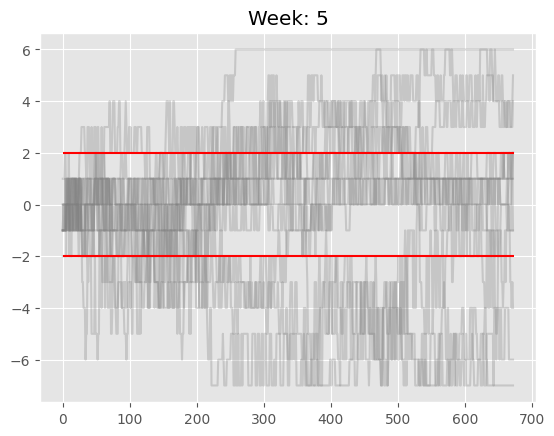

In [86]:
for week_number in range(1, 6):
    path2count_dict = week2path2count[week_number]
    path2count = pd.Series(path2count_dict).copy()
    path2count = path2count.copy()

    pathes_df = (
        path2count.apply(pd.Series)
            .replace('', np.nan)
            .dropna(how='all', axis=1)
            .astype(float)
            .dropna(axis=0)
    )
    plt.title(f'Week: {week_number}')
    for col in pathes_df.index:
        pathes_df.loc[col].plot(alpha=0.3, color='grey')
    plt.hlines(-2, 0, pathes_df.shape[1], color='red')
    plt.hlines(2, 0, pathes_df.shape[1], color='red')
    plt.show()

# For all weeks

In [55]:
start2end_pob = {}
start2end_len = {}
start2end_len_std = {}
start2end_counts = {}

MAX_END = 6
for min_start in range(1, 5):
    row_increasing_patterns = get_increasing_patterns(total_pathes_df, min_start, MAX_END)
    len_till_end = row_increasing_patterns[row_increasing_patterns >= MAX_END-1].apply(first_high_value, axis=1)
    len_till_end_mean = len_till_end.mean()
    len_till_end_std = len_till_end.std()
    probability_pattern = get_percent_increasing(total_pathes_df, min_start, MAX_END)
    start2end_pob[min_start] = probability_pattern
    start2end_len[min_start] = len_till_end_mean
    start2end_len_std[min_start] = len_till_end_std
    start2end_counts[min_start] = row_increasing_patterns.shape[0]

start2end_pob = pd.Series(start2end_pob)
start2end_len = pd.Series(start2end_len)
start2end_len_std = pd.Series(start2end_len_std).round(2)
start2end_counts = pd.Series(start2end_counts)

# create 
start2end_df_start = pd.DataFrame.from_dict({'prob': start2end_pob, 
                                       'len_hours': start2end_len, 
                                       'count': start2end_counts,
                                       'len_hours_std': start2end_len_std})
start2end_df_start['len_days'] = (start2end_df_start['len_hours'] / 24).round(2)
start2end_df_start['end_harmonic'] = MAX_END


start2end_pob = {}
start2end_len = {}
start2end_len_std = {}
start2end_counts = {}
MAX_END = -6
for min_start in range(-1, -5, -1):
    row_increasing_patterns = get_increasing_patterns(total_pathes_df, min_start, MAX_END)
    len_till_end = row_increasing_patterns[row_increasing_patterns <= MAX_END+1].apply(
        first_high_value, axis=1)
    len_till_end_mean = len_till_end.mean()
    len_till_end_std = len_till_end.std()
    probability_pattern = get_percent_increasing(total_pathes_df, min_start, MAX_END)
    start2end_pob[min_start] = probability_pattern
    start2end_len[min_start] = len_till_end_mean
    start2end_len_std[min_start] = len_till_end_std
    start2end_counts[min_start] = row_increasing_patterns.shape[0]

#     start2end_pob = pd.Series(start2end_pob)
#     start2end_len = pd.Series(start2end_len)
#     start2end_len_std = pd.Series(start2end_len_std).round(2)
#     start2end_counts = pd.Series(start2end_counts)

start2end_df_neg = pd.DataFrame.from_dict({'prob': start2end_pob, 
                                       'len_hours': start2end_len, 
                                       'count': start2end_counts,
                                       'len_hours_std': start2end_len_std})
start2end_df_neg['len_days'] = (start2end_df_neg['len_hours'] / 24).round(2)
start2end_df_neg['end_harmonic'] = MAX_END
start2end_df = pd.concat([start2end_df_start, start2end_df_neg], axis=0)

#     print
#     start2end_df.index.name = 'start_harmonic'
start2end_df = start2end_df.reset_index()

start2end_df = start2end_df.rename(columns={'index': 'start_harmonic'})
start2end_df

,start_harmonic,prob,len_hours,count,len_hours_std,len_days,end_harmonic
0,1,0.008346,157.000000,17,138.360000,6.54,6
1,2,0.020175,255.500000,23,189.500000,10.65,6
2,3,0.048027,210.625000,28,169.510000,8.78,6
3,4,0.239766,349.560000,82,141.160000,14.56,6
4,-1,0.012999,254.428571,28,159.555495,10.60,-6
5,-2,0.034224,240.600000,41,161.447857,10.02,-6
6,-3,0.078740,196.500000,60,167.449191,8.19,-6
7,-4,0.211293,238.277108,116,128.776448,9.93,-6


# Decreasing Pattern

In [56]:
start2end_pob = {}
start2end_len = {}
start2end_len_std = {}
start2end_counts = {}

min_start = 7
for max_end in range(1, 2):
    row_increasing_patterns = get_increasing_patterns(pathes_df, min_start, MAX_END)
    len_till_end = row_increasing_patterns[row_increasing_patterns >= max_end-1].apply(first_high_value, axis=1)
    len_till_end_mean = len_till_end.mean()
    len_till_end_std = len_till_end.std()
    probability_pattern = get_percent_incresing(pathes_df, min_start, MAX_END)
    start2end_pob[min_start] = probability_pattern
    start2end_len[min_start] = len_till_end_mean
    start2end_len_std[min_start] = len_till_end_std
    start2end_counts[min_start] = row_increasing_patterns.shape[0]

start2end_pob = pd.Series(start2end_pob)
start2end_len = pd.Series(start2end_len)
start2end_len_std = pd.Series(start2end_len_std).round(2)
start2end_counts = pd.Series(start2end_counts)

# create 
start2end_df_start = pd.DataFrame.from_dict({'prob': start2end_pob, 
                                       'len_hours': start2end_len, 
                                       'count': start2end_counts,
                                       'len_hours_std': start2end_len_std})
start2end_df_start['len_days'] = (start2end_df_start['len_hours'] / 24).round(2)
start2end_df_start['end_harmonic'] = MAX_END

NameError: name 'get_percent_incresing' is not defined

In [167]:
MIN_HARMONIC_THRESH = 3
row_increasing_patterns = []
for idx, row in pathes_df.iterrows():
    row_increasing = row[(row >= MIN_HARMONIC_THRESH) & (row <= 7)].tolist()
    
    if row_increasing:
        slope = (row_increasing[-1] - row_increasing[0]) / len(row_increasing)
        if slope > 0:
            row_increasing_patterns.append(row_increasing)
row_increasing_patterns = pd.DataFrame(row_increasing_patterns)
display(row_increasing_patterns)

,0,1,2,3,4,5,6,7,8,9,...,632,633,634,635,636,637,638,639,640,641
0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
all_higher_than_treshold_patterns = []
for idx, row in pathes_df.iterrows():
    row_higher = row[(row >= MIN_HARMONIC_THRESH)].tolist()
    if row_higher:
        all_higher_than_treshold_patterns.append(row_higher)
all_higher_than_treshold_patterns = pd.DataFrame(all_higher_than_treshold_patterns)
probability_pattern = row_increasing_patterns.shape[0] / all_higher_than_treshold_patterns.shape[0]
probability_pattern

0.2916666666666667

# Window size and predictability

In [87]:
X = pd.DataFrame(total_pathes_df.index.map(diapazon), index=total_pathes_df.index)
X

,0
2021-1,195.90
2021-10,68.18
2021-11,83.57
2021-12,88.31
2021-13,86.49
...,...
2023-50,88.70
2023-6,51.50
2023-7,100.90
2023-8,89.90


In [92]:
value_counts_df = pd.DataFrame()
for week_diapazon in total_pathes_df.index:
    value_counts = total_pathes_df.loc[week_diapazon].value_counts(normalize=True)
    value_counts_df = pd.concat([value_counts_df, value_counts], axis=1)
value_counts_df = value_counts_df.T.fillna(0)
value_counts_df

,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0
2021-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.157504,0.632987,0.205052,0.004458,0.000000,0.000000,0.000000,0.000000,0.000000
2021-10,0.000000,0.000000,0.040119,0.057949,0.054978,0.060921,0.148588,0.213967,0.257058,0.092125,0.052006,0.022288,0.000000,0.000000
2021-11,0.000000,0.010401,0.092125,0.133730,0.144131,0.068351,0.151560,0.196137,0.117385,0.066865,0.019316,0.000000,0.000000,0.000000
2021-12,0.170877,0.112927,0.150074,0.188707,0.075780,0.053492,0.078752,0.095097,0.056464,0.017831,0.000000,0.000000,0.000000,0.000000
2021-13,0.212481,0.114413,0.118871,0.185736,0.203566,0.095097,0.052006,0.016345,0.001486,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-50,0.000000,0.000000,0.000000,0.000000,0.038633,0.200594,0.410104,0.298663,0.052006,0.000000,0.000000,0.000000,0.000000,0.000000
2023-6,0.000000,0.000000,0.000000,0.000000,0.000000,0.038633,0.150074,0.228826,0.264487,0.213967,0.086181,0.017831,0.000000,0.000000
2023-7,0.000000,0.000000,0.000000,0.000000,0.001486,0.145617,0.472511,0.301634,0.063893,0.014859,0.000000,0.000000,0.000000,0.000000
2023-8,0.000000,0.000000,0.000000,0.000000,0.000000,0.057949,0.120357,0.277860,0.353640,0.141159,0.047548,0.001486,0.000000,0.000000


### Pearson Corr

In [94]:
value_counts_df['diapazon_width'] = X
pearsonr = value_counts_df.corr()['diapazon_width'].drop('diapazon_width').sort_values()
pearsonr

-4.0   -0.293779
-5.0   -0.286019
-6.0   -0.272932
-7.0   -0.269851
-3.0   -0.200270
3.0    -0.190020
6.0    -0.184544
5.0    -0.176893
2.0    -0.135306
4.0    -0.131350
-2.0   -0.112344
1.0    -0.066708
-1.0   -0.000159
0.0     0.296266
Name: diapazon_width, dtype: float64

In [96]:
from scipy.stats import pearsonr
MAX_P_VALUE = 0.05
pearson_corr = pd.Series()
for col in value_counts_df.drop('diapazon_width', axis=1).columns:
    corr, p_value = pearsonr(value_counts_df[col], value_counts_df['diapazon_width'])
    if p_value <= MAX_P_VALUE:
        pearson_corr[col] = corr
pearson_corr.sort_values()

/tmp/ipykernel_3859/2892913279.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pearson_corr = pd.Series()


-7.0   -0.183494
 0.0    0.458959
dtype: float64

/tmp/ipykernel_3859/957352432.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  spearman_corr = pd.Series()


<Axes: >

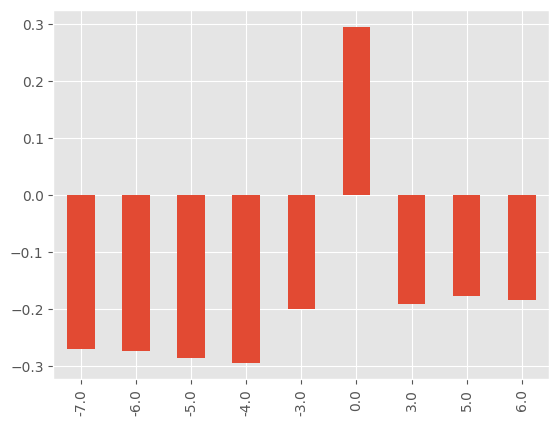

In [102]:
from scipy.stats import spearmanr
MAX_P_VALUE = 0.05
spearman_corr = pd.Series()
for col in value_counts_df.drop('diapazon_width', axis=1).columns:
    corr, p_value = spearmanr(value_counts_df[col], value_counts_df['diapazon_width'])
    if p_value <= MAX_P_VALUE:
        spearman_corr[col] = corr
spearman_corr.sort_index().plot(kind='bar')

In [152]:
query_value = 6.5
info_dict = defaultdict(list)
for idx, row in pathes_df.iterrows():
    x = row.rolling(6).mean()
    x = x.dropna()
    cond = (x >= query_value) & (x.shift(1) < query_value)
    interested_index = x[cond].index
    
    if not interested_index.empty:
        z = x[:interested_index[0]]

        cond1 = z >= z.shift(1)
        z = z[cond1]
        length = z.index[-1] - z.index[0]

        info_dict[z.iloc[0]].append({'length': length, 'streak': z.values})
info_ser = pd.Series(info_dict)
info_ser.apply(pd.Series)

,0,1,2,3
1.0,"{'length': 395, 'streak': [1.0, 1.0, 1.0, 1.0,...","{'length': 198, 'streak': [1.0, 1.0, 1.0, 1.0,...","{'length': 65, 'streak': [1.0, 1.0, 1.0, 1.0, ...","{'length': 508, 'streak': [1.0, 1.0, 1.0, 0.33..."
1.5,"{'length': 147, 'streak': [1.5, 1.666666666666...",NaN,NaN,NaN
0.5,"{'length': 137, 'streak': [0.5, 0.5, 0.5, 0.66...",NaN,NaN,NaN


In [144]:
z

6      1.000000
7      1.000000
8      1.000000
9      1.000000
10     1.000000
         ...   
306    2.833333
307    3.000000
308    3.000000
309    3.000000
311    2.833333
Name: 15, Length: 287, dtype: float64

In [76]:
pathes_df.cummax(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [83]:
def find_consecutive_streaks(series_a, series_b):
    streaks = []
    current_streak = []
    start_index = None

    for i, (a, b) in enumerate(zip(series_a, series_b)):
        if a == b:
            if start_index is None:
                start_index = i
            current_streak.append(a)
        else:
            if start_index is not None:
                streaks.append((start_index, i - 1, current_streak))
                current_streak = []
                start_index = None

    # Check for the last streak
    if start_index is not None:
        streaks.append((start_index, i, current_streak))

    return streaks

# Find consecutive matching streaks
streak2freq = defaultdict(int)
for idx in range(pathes_df.shape[0]-1):
    consecutive_streaks = find_consecutive_streaks(pathes_df.iloc[idx],
                                                   pathes_df.iloc[idx+1])
    for start, end, streak in consecutive_streaks:
        streak = ''.join([str(int(x)) for x in streak])
        streak2freq[streak] += 1

# # Print the results
# for start, end, streak in consecutive_streaks:
#     print(f"Consecutive Streak ({start}-{end}): {streak}")
len(streak2freq)

151

In [84]:
streak2freq = pd.Series(streak2freq).sort_values(ascending=False)
streak2freq[streak2freq > 2]

1                           65
0                           39
11                          26
2                           24
-1                          20
111                         17
3                           15
1111                        14
22                          13
-1-1                        12
7                           10
1111111111                  10
1111111                      9
000                          9
00                           9
4                            8
0000                         8
11111111111111111            8
111111111111111111111111     7
111111111                    7
222                          7
11111                        6
-1-1-1-1-1-1                 6
-1-1-1-1                     5
1111111111111                5
00000                        5
-2                           5
11111111                     5
33                           4
1111111111111111             4
111111111111                 4
2222                         4
11111111

#### bitcoin

In [60]:
url = f"""
https://www.alphavantage.co/query
?function=CRYPTO_INTRADAY
&symbol=BTC
&market=USD
&interval=60min
&apikey={PREMIUM_API_KEY}
""".replace('\n', '')
print(url)
r = requests.get(url)
data = r.json()
bitcoin_df = pd.DataFrame(data['Time Series Crypto (60min)']).T
bitcoin_df

https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol=BTC&market=USD&interval=60min&apikey=B3NUDPWV2FSGX37H


,1. open,2. high,3. low,4. close,5. volume
2024-01-14 10:00:00,43052.41000,43066.56000,42939.80000,42981.85000,204
2024-01-14 09:00:00,42996.26000,43079.00000,42818.34000,43052.41000,775
2024-01-14 08:00:00,43011.44000,43030.00000,42888.00000,42996.25000,569
2024-01-14 07:00:00,42999.00000,43060.00000,42891.12000,43011.44000,960
2024-01-14 06:00:00,42749.99000,42999.00000,42749.99000,42998.99000,864
...,...,...,...,...,...
2024-01-10 11:00:00,45532.01000,45659.42000,45000.00000,45515.89000,2363
2024-01-10 10:00:00,45661.43000,45731.10000,45532.00000,45532.00000,1101
2024-01-10 09:00:00,45329.94000,45700.00000,45321.99000,45661.42000,2388
2024-01-10 08:00:00,45757.98000,45861.10000,45320.53000,45329.94000,2517


#### eurusd

In [62]:
url = f"""
https://www.alphavantage.co/query
?function=FX_INTRADAY
&from_symbol=EUR
&to_symbol=USD
&outputsize=compact
&interval=60min
&apikey={PREMIUM_API_KEY}
""".replace('\n', '')
print(url)
r = requests.get(url)
data = r.json()
print(data.keys())
eur_df = pd.DataFrame(data['Time Series FX (60min)']).T
eur_df

https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=EUR&to_symbol=USD&market=USD&outputsize=compact&interval=60min&apikey=B3NUDPWV2FSGX37H
dict_keys(['Meta Data', 'Time Series FX (60min)'])


,1. open,2. high,3. low,4. close
2024-01-12 21:00:00,1.09557,1.09564,1.09502,1.09512
2024-01-12 20:00:00,1.09593,1.09635,1.09534,1.09560
2024-01-12 19:00:00,1.09497,1.09596,1.09488,1.09595
2024-01-12 18:00:00,1.09583,1.09588,1.09469,1.09496
2024-01-12 17:00:00,1.09663,1.09738,1.09579,1.09583
...,...,...,...,...
2024-01-08 22:00:00,1.09544,1.09564,1.09477,1.09495
2024-01-08 21:00:00,1.09608,1.09611,1.09490,1.09547
2024-01-08 20:00:00,1.09554,1.09630,1.09527,1.09611
2024-01-08 19:00:00,1.09644,1.09658,1.09486,1.09553


### DXY

In [75]:
dxy = pd.read_csv('data/TVC_DXY, 60 (1).csv')
dxy['time'] = pd.to_datetime(dxy['time'])
dxy

,time,open,high,low,close
0,2020-01-01 00:00:00+00:00,96.500,96.500,96.500,96.500
1,2020-01-01 01:00:00+00:00,96.502,96.975,96.480,96.913
2,2020-01-01 02:00:00+00:00,97.005,97.101,97.005,97.061
3,2020-01-01 03:00:00+00:00,97.006,97.103,97.006,97.061
4,2020-01-01 04:00:00+00:00,97.061,97.103,97.006,97.093
...,...,...,...,...,...
25063,2024-01-12 17:00:00+00:00,102.389,102.486,102.385,102.455
25064,2024-01-12 18:00:00+00:00,102.460,102.470,102.376,102.380
25065,2024-01-12 19:00:00+00:00,102.381,102.420,102.338,102.404
25066,2024-01-12 20:00:00+00:00,102.407,102.447,102.397,102.442


In [49]:
df.index = pd.to_datetime(df.index)
df

,1. open,2. high,3. low,4. close,5. volume
2024-01-12 20:00:00,476.6800,476.6800,476.6800,476.6800,670811
2024-01-12 19:00:00,475.8000,475.8800,475.6200,475.6200,28328
2024-01-12 18:00:00,475.9800,476.6800,475.5500,475.7000,764975
2024-01-12 17:00:00,476.1200,476.3300,461.2820,476.0000,64551
2024-01-12 16:00:00,476.6600,477.1450,475.9700,476.1500,6408788
...,...,...,...,...,...
2023-12-22 08:00:00,472.7900,474.0000,471.8900,473.9700,762319
2023-12-22 07:00:00,472.7100,472.9500,472.6000,472.6600,88911
2023-12-22 06:00:00,472.6500,472.7700,472.4400,472.7300,134977
2023-12-22 05:00:00,472.4000,472.6500,472.2600,472.6400,31554


In [52]:
df.index = df.index.tz_localize('US/Eastern').tz_convert('UTC')
fg

DatetimeIndex(['2024-01-13 01:00:00+00:00', '2024-01-13 00:00:00+00:00',
               '2024-01-12 23:00:00+00:00', '2024-01-12 22:00:00+00:00',
               '2024-01-12 21:00:00+00:00', '2024-01-12 20:00:00+00:00',
               '2024-01-12 19:00:00+00:00', '2024-01-12 18:00:00+00:00',
               '2024-01-12 17:00:00+00:00', '2024-01-12 16:00:00+00:00',
               ...
               '2023-12-22 18:00:00+00:00', '2023-12-22 17:00:00+00:00',
               '2023-12-22 16:00:00+00:00', '2023-12-22 15:00:00+00:00',
               '2023-12-22 14:00:00+00:00', '2023-12-22 13:00:00+00:00',
               '2023-12-22 12:00:00+00:00', '2023-12-22 11:00:00+00:00',
               '2023-12-22 10:00:00+00:00', '2023-12-22 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=238, freq=None)

In [32]:
data['Meta Data']

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'ES',
 '3. Last Refreshed': '2024-01-12 19:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

# ES1 and NS1 futures data

In [53]:
es1 = pd.read_csv('data/CME_MINI_DL_ES1!, 60 (1).csv')
es1

,time,open,high,low,close
0,2020-01-09T13:00:00Z,3268.50,3271.75,3267.25,3270.75
1,2020-01-09T14:00:00Z,3270.75,3274.00,3265.50,3269.25
2,2020-01-09T15:00:00Z,3269.00,3274.75,3266.00,3274.00
3,2020-01-09T16:00:00Z,3274.00,3275.25,3270.00,3274.25
4,2020-01-09T17:00:00Z,3274.50,3275.25,3264.25,3269.50
...,...,...,...,...,...
23719,2024-01-12T17:00:00Z,4807.00,4815.00,4803.50,4811.50
23720,2024-01-12T18:00:00Z,4811.50,4820.50,4811.50,4819.50
23721,2024-01-12T19:00:00Z,4819.75,4823.75,4811.50,4812.75
23722,2024-01-12T20:00:00Z,4812.75,4819.50,4807.75,4816.75


In [55]:
nq1 = pd.read_csv('data/CME_MINI_DL_NQ1!, 60 (1).csv')
nq1

,time,open,high,low,close
0,2020-01-12T23:00:00Z,8979.00,8999.50,8979.00,8987.50
1,2020-01-13T00:00:00Z,8987.75,8997.25,8985.25,8995.00
2,2020-01-13T01:00:00Z,8995.25,9013.25,8995.25,9001.25
3,2020-01-13T02:00:00Z,9001.25,9012.25,9000.00,9011.00
4,2020-01-13T03:00:00Z,9011.00,9014.75,9009.25,9010.50
...,...,...,...,...,...
23687,2024-01-12T17:00:00Z,16928.75,16965.00,16917.25,16953.75
23688,2024-01-12T18:00:00Z,16953.75,16983.25,16953.50,16979.25
23689,2024-01-12T19:00:00Z,16979.25,16994.00,16943.50,16951.00
23690,2024-01-12T20:00:00Z,16951.25,16980.00,16932.00,16972.25
